In [2]:
import artm

lc = artm.messages.ConfigureLoggingArgs()
# lc.minloglevel=2  # 0 = INFO, 1 = WARNING, 2 = ERROR, 3 = FATAL

# when pass lc to constructor you may also change log location like this:  lc.log_dir=r'C:\bigartm_log'
lc.log_dir=r'/home/mmilkov2/projects/artm_log/'
lib = artm.wrapper.LibArtm(logging_config=lc)

In [34]:
import os

# data_file='rnd-walls_filtered_vpw.txt'
data_file='rnd-walls_spam_filteredLR_vpw.txt'
data_dir = os.path.join('..', 'results_from_rnd_walls', 'data')

# ----  BIGARTM !!! ------
batch_vectorizer = artm.BatchVectorizer(data_path=os.path.join(data_dir,data_file),
                                        data_format='vowpal_wabbit',
                                        target_folder='collection_batches_filtered',
                                        class_ids=['text', 'bigrams'] 
                                       )

main_dictionary = artm.Dictionary()
main_dictionary.gather(data_path='collection_batches_filtered')
main_dictionary.save(dictionary_path= os.path.join('collection_batches_filtered','main_dictionary'))
main_dictionary.save_text(dictionary_path=os.path.join('collection_batches_filtered','main_dictionary.txt'))

In [3]:
import os
main_dictionary = artm.Dictionary()
main_dictionary.load_text(dictionary_path=os.path.join('collection_batches_filtered','main_dictionary_raw.txt'))

In [4]:
import pandas as pd

# look up file in pandas
dictionary_path=os.path.join('collection_batches_filtered','main_dictionary_raw.txt')
header=['token', 'class_id', 'value', 'tf', 'df']
main_pd = pd.read_csv(dictionary_path, delimiter=',', names=header, encoding="utf8")
#main_pd = main_pd.sort_values(by ='df', ascending=False)
main_pd.shape[0]

/tmp/ipykernel_78484/2371880451.py:6: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  main_pd = pd.read_csv(dictionary_path, delimiter=',', names=header, encoding="utf8")


966514

In [5]:
main_pd_=main_pd[2:]
main_pd_.head()

token  class_id                    value    tf    df
2    свидание_мэри   bigrams    7.011093430264737e-07   1.0   1.0
3       кошка_свет   bigrams    7.011093430264737e-07   1.0   1.0
4  концерт_виталий   bigrams    7.011093430264737e-07   1.0   1.0
5     март_концерт   bigrams   1.4022186860529473e-06   2.0   2.0
6     перенести_ое   bigrams   1.4022186860529473e-06   2.0   2.0

In [6]:
print ('Number of words ', main_pd_.loc[(main_pd_.class_id==' text')].shape[0])
print ('Number of bigrams ', main_pd_.loc[(main_pd_.class_id==' bigrams')].shape[0])

Number of words  84067
Number of bigrams  882445


In [7]:
main_pd_['df'] = main_pd_['df'].astype('float')
main_pd_['tf'] = main_pd_['tf'].astype('float')

/tmp/ipykernel_78484/1489638965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_pd_['df'] = main_pd_['df'].astype('float')
/tmp/ipykernel_78484/1489638965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_pd_['tf'] = main_pd_['tf'].astype('float')


In [8]:
# look up to the most common words
main_pd_.sort_values(by=['df'], ascending=False, inplace=True)
main_pd_[:50]

/tmp/ipykernel_78484/3567856371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_pd_.sort_values(by=['df'], ascending=False, inplace=True)


token class_id     value       tf       df
681190        не     text  0.031285  47667.0  20026.0
581229       это     text  0.013763  20970.0  11383.0
520013       всё     text  0.009484  14450.0   9488.0
396256      весь     text  0.007415  11297.0   8159.0
520304      день     text  0.005456   8313.0   6290.0
477148      свой     text  0.006853  10441.0   6056.0
924278   человек     text  0.006276   9563.0   6003.0
581903   который     text   0.00565   8609.0   5298.0
599303     жизнь     text  0.004705   7169.0   5121.0
429337   хороший     text  0.004032   6143.0   4938.0
658884       год     text  0.005039   7678.0   4884.0
589396    любить     text  0.004112   6265.0   4643.0
564175      мочь     text  0.004685   7138.0   4583.0
518379     очень     text  0.003629   5529.0   4201.0
552500    хотеть     text  0.003737   5694.0   4137.0
498409       наш     text   0.00365   5562.0   3992.0
890827     новый     text  0.003262   4970.0   3936.0
520292       ещё     text  0.003207   4886.0   3925.0
398321      друг     text  0.003613   5505.0   3835.0
536902    просто     text  0.002978   4537.0   3629.0
519779     время     text  0.003013   4591.0   3328.0
523572     знать     text  0.002945   4487.0   3291.0
949181     самый     text  0.002729   4158.0   3254.0
497996    каждый     text  0.002736   4168.0   3053.0
413486   большой     text  0.002444   3724.0   2996.0
422051   сегодня     text  0.002084   3175.0   2757.0
516312    любовь     text  0.002577   3926.0   2698.0
671186   любимый     text  0.001823   2777.0   2520.0
517426    первый     text   0.00201   3063.0   2453.0
557841   спасибо     text  0.001882   2867.0   2445.0
536526       мир     text  0.002041   3110.0   2374.0
312031     стать     text   0.00198   3017.0   2336.0
504471    делать     text   0.00201   3063.0   2304.0
392063  смотреть     text  0.001783   2716.0   2280.0
820524      твой     text  0.002395   3649.0   2250.0
515855  говорить     text  0.002113   3220.0   2248.0
587832   сказать     text  0.002143   3265.0   2238.0
613670      жить     text  0.001827   2783.0   2190.0
498357   сделать     text  0.001851   2820.0   2160.0
701117    работа     text  0.001844   2810.0   2122.0
513726       ваш     text  0.002258   3440.0   2118.0
508673   ребёнок     text  0.002346   3575.0   2075.0
459207     слово     text  0.001729   2635.0   2031.0
506975      душа     text  0.001586   2416.0   1964.0
522359     ждать     text  0.001483   2260.0   1954.0
455025   счастие     text  0.001512   2303.0   1886.0
572394       дом     text  0.001548   2359.0   1853.0
434676      рука     text  0.001516   2310.0   1788.0
535317    думать     text   0.00145   2209.0   1716.0
421242     нужно     text  0.001465   2232.0   1674.0

In [9]:
# filter words with df less than 2 and greater than 7000
main_dictionary.filter(class_id='text', min_df=2, max_df=7000) 

artm.Dictionary(name=48a7146b-58a5-4acd-804f-29409066739c, num_entries=924801)

In [44]:
# look up to the most frequent bigrams
main_pd_bi=main_pd_.loc[(main_pd_.class_id==' bigrams')]
main_pd_bi.sort_values(by=['df'], ascending=False, inplace=True)
main_pd_bi[:50]

/tmp/ipykernel_86984/525079711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_pd_bi.sort_values(by=['df'], ascending=False, inplace=True)


token  class_id     value      tf      df
341380          не_мочь   bigrams   0.00117  1669.0  1413.0
499015           это_не   bigrams  0.001165  1662.0  1389.0
510098    день_рождение   bigrams  0.000842  1201.0  1109.0
816804         не_знать   bigrams  0.000897  1280.0  1081.0
586306  человек_который   bigrams  0.000751  1071.0   932.0
393350        новый_год   bigrams  0.000728  1038.0   917.0
523486         никто_не   bigrams  0.000731  1042.0   907.0
891899        друг_друг   bigrams  0.000598   853.0   683.0
447785      каждый_день   bigrams  0.000477   680.0   608.0
523608       который_не   bigrams  0.000446   636.0   576.0
886734        не_хотеть   bigrams  0.000459   655.0   556.0
798568        всё_равно   bigrams  0.000403   575.0   520.0
615898          всё_это   bigrams  0.000379   540.0   497.0
951871           ещё_не   bigrams   0.00037   528.0   497.0
347388       человек_не   bigrams  0.000365   521.0   490.0
544080        не_любить   bigrams  0.000398   568.0   477.0
444501       свой_жизнь   bigrams  0.000344   490.0   417.0
316724    самый_хороший   bigrams  0.000315   450.0   412.0
454137         всё_таки   bigrams  0.000298   425.0   403.0
483921         не_смочь   bigrams   0.00029   413.0   379.0
458343       большой_не   bigrams  0.000305   435.0   377.0
510624         жизнь_не   bigrams  0.000271   386.0   363.0
491965       весь_жизнь   bigrams  0.000255   363.0   341.0
487944          мочь_не   bigrams  0.000267   381.0   338.0
523491        не_видеть   bigrams  0.000251   358.0   337.0
835473        год_назад   bigrams  0.000246   351.0   335.0
515641       не_бояться   bigrams  0.000271   386.0   334.0
376134          пока_не   bigrams  0.000249   355.0   328.0
542050           не_всё   bigrams  0.000242   345.0   323.0
527569        не_стоить   bigrams   0.00023   328.0   309.0
928049          это_всё   bigrams  0.000231   329.0   308.0
442106           всё_не   bigrams  0.000219   313.0   296.0
283069       не_хватать   bigrams  0.000229   327.0   295.0
583324            не_не   bigrams  0.000228   325.0   295.0
511219        не_верить   bigrams  0.000214   305.0   281.0
357872        любить_не   bigrams  0.000214   305.0   279.0
545873         не_иметь   bigrams  0.000216   308.0   278.0
546632     спасибо_весь   bigrams  0.000202   288.0   278.0
359040         не_стать   bigrams  0.000203   290.0   273.0
450573         весь_мир   bigrams  0.000205   292.0   271.0
840485        не_нужный   bigrams  0.000206   294.0   268.0
785068        не_просто   bigrams  0.000201   287.0   268.0
456881      не_понимать   bigrams  0.000203   289.0   262.0
317830         сей_пора   bigrams  0.000194   276.0   259.0
649766        просто_не   bigrams  0.000194   277.0   257.0
855863         не_нужно   bigrams  0.000204   291.0   256.0
522381          это_год   bigrams  0.000191   272.0   255.0
498254        не_думать   bigrams  0.000189   270.0   255.0
655439        не_забыть   bigrams  0.000188   268.0   254.0
495239      добрый_утро   bigrams  0.000177   252.0   252.0

In [45]:
# filter bigrams with df less than 2
main_dictionary.filter(class_id='bigrams', min_df=2) 

artm.Dictionary(name=9160bb81-0a83-46be-b8ba-881189fd07e4, num_entries=196277)

In [46]:
# -- Set up domain (d) and background (b) topics 

def SetTopicsNum(d, b):
    background_topics = []
    domain_topics = []
    all_topics = []

    for i in range(1, d+b+1):
        if i <= d:
            topic_name = "d" + str(i)
            domain_topics.append(topic_name)
        else:
            topic_name = "b" + str(i)
            background_topics.append(topic_name)
        all_topics.append(topic_name)
    return all_topics, domain_topics, background_topics
# ---
#-- Initialize model
batch_vectorizer = artm.BatchVectorizer(data_path='collection_batches_filtered',
                                        data_format='batches')
#main_dictionary = artm.Dictionary()
#main_dictionary.load_text(dictionary_path='collection_batches/main_dictionary.txt')

In [47]:
def SetScores(model):
    
    model.scores.add(artm.PerplexityScore(name='Perplexity_Score',
                                      dictionary=main_dictionary))
 
    model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_bigrams', 
                                           class_id='bigrams')) #, 
                                           #topic_names = domain_topics))                      
    
    model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) #, #,
                                          # topic_names = domain_topics))
    
    model.scores.add(artm.TopTokensScore(name='Bigrams_Top10_Tokens', 
                                         num_tokens=10, 
                                         dictionary = main_dictionary,
                                         class_id='bigrams'))
                                        # topic_names = topics_subj)
    
    model.scores.add(artm.TopTokensScore(name='Text_Top10_Tokens', 
                                         num_tokens=10, 
                                         dictionary = main_dictionary,
                                         class_id='text'))
                                        # topic_names = topics_subj)
          
    model.scores.add(artm.TopicKernelScore(name='DomainTopicKernelScore', 
                                           probability_mass_threshold=0.25, 
                                           #dictionary = main_dictionary,
                                           class_id='bigrams' )) #, 
                                           #topic_names = domain_topics))


In [48]:
import matplotlib.pyplot as plt

def plot_figures(model):

    # perplexity
    x = range(model.num_phi_updates)[1:]
    fig, ax1 = plt.subplots()
    #plt.title(u'Метрики качества модели, 15*'+ '$\\tau$/|$W_t$|, $\\tau$='+ str(format(tau_value, ".0e")), fontsize=14, y=1.06)
    
    ax1.plot(x, model.score_tracker['Perplexity_Score'].value[1:], 'g-', linewidth=1, label=u"Перплексия")
    ax1.set_xlabel(u'Номер итерации')
    ax1.set_ylabel(u'Перплексия', color='g')
    ax2 = ax1.twinx()
    
   # ax2.plot(x, model.score_tracker['SparsityPhiScore_text'].value[1:], 'r*', linewidth=1, label=u'Разреженность '+'$\\Phi$'+'-text')
    ax2.plot(x, model.score_tracker['SparsityPhiScore_bigrams'].value[1:], 'r:', linewidth=1, label=u'Разреженность '+'$\\Phi$'+'-bigrams')
    ax2.plot(x, model.score_tracker['SparsityThetaScore'].value[1:], 'r-.', linewidth=1, label=u'Разреженность '+'$\\Theta$')
    ax2.set_ylabel(u'Доля', color='r')
    ax2.legend(bbox_to_anchor=(1.10, 1), loc=2, borderaxespad=0.)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    
    
    ax1.text(0.14, -0.16, u'Перплексия: ' + str(round(model.score_tracker['Perplexity_Score'].last_value, 3))+
            # u'\nРазреженность ' +'$\\Phi$'+'-text: ' + str(round(model.score_tracker['SparsityPhiScore_text'].last_value, 3))+
             u',  Разреженность ' +'$\\Phi$'+'-bigrams: ' +str(round(model.score_tracker['SparsityPhiScore_bigrams'].last_value, 3))+
             u'\nРазреженность ' +'$\\Theta$: '+str(round(model.score_tracker['SparsityThetaScore'].last_value,3)), 
         transform=plt.gcf().transFigure, bbox=props)


    plt.grid(True)
    #plt.savefig(topics_directory+'scores_sparsity.png', dpi=150, bbox_inches = 'tight')
    #plt.show()
    
    # kernels
    x = range(model.num_phi_updates)[1:]
    fig, ax1 = plt.subplots()
    ax1.plot(x, model.score_tracker['DomainTopicKernelScore'].average_size[1:], 'g-', linewidth=1, label=u"Размер ядра")
    ax1.set_xlabel(u'Номер итерации')
    ax1.set_ylabel(u'Размер ядра', color='g')
    ax2 = ax1.twinx()
    ax2.plot(x, model.score_tracker['DomainTopicKernelScore'].average_contrast[1:], 'r*', linewidth=1, label=u"Контраст")
    ax2.plot(x, model.score_tracker['DomainTopicKernelScore'].average_purity[1:], 'r--', linewidth=1, label=u"Чистота")
    ax2.set_ylabel(u'Доля', color='r')
    ax2.legend(bbox_to_anchor=(1.10, 1), loc=2, borderaxespad=0.)
    kernel=model.score_tracker['DomainTopicKernelScore'].last_average_size
    last_average_contrast=model.score_tracker['DomainTopicKernelScore'].last_average_contrast
    last_average_purity=model.score_tracker['DomainTopicKernelScore'].last_average_purity
    ax1.text(0.14, -0.07, u'Размер ядра: ' + str(round(kernel, 3))+
             u',  Контраст: ' + str(round(last_average_contrast, 3))+
             u',  Чистота: ' + str(round(last_average_purity, 3)),
         transform=plt.gcf().transFigure, bbox=props)
    
    plt.grid(True)
    #plt.savefig(topics_directory+'scores_kernel.png', dpi=150, bbox_inches = 'tight')
    
    return kernel, last_average_contrast, last_average_purity

In [49]:
# The header of the table was preformed:
#TopicTrackerTable = pd.DataFrame(columns=['num', 'seed', topics num', 'class_ids', 'steps num', 'strategy', 'perplexity', 'Phi-sparcity', 'Theta-sparcity', 'Kernel size', 'Contrast', 'Purity'])
# We read the current table in order to determine the number of rows in it, so that the subsequent entry can be written below
results_dir='./testing_filtered/'
model_results_file='models_testing_filt.csv'

def ReadTableResults():    
    TopicTrackerTable_cur = pd.read_csv(results_dir+model_results_file)
    rows_num= TopicTrackerTable_cur.shape[0]
    return TopicTrackerTable_cur, rows_num

In [50]:
# создаем новый файл + rows_num (число строк)
# сохраняем все топ-токены всех тем в отдельный файл

import os
results_dir='./testing_filtered/'

def CreateFilesWithTopics(rows_num):

    file_name="topic_tokens_"+str(rows_num+1)+'.txt'
    topics_path=results_dir + file_name

    top_tokens = model.score_tracker["Bigrams_Top10_Tokens"]
    
    with open(results_dir+file_name, 'w') as f:
        for topic_name in all_topics:
            for (item, weight) in zip(top_tokens.last_tokens[topic_name], top_tokens.last_weights[topic_name]):
                f.write(item +', '+str(round(weight,5))+'\n')
            f.write('\n')

In [51]:
results_dir='./testing_filtered/'
def WritingModelsResultsToFile(TopicTrackerTable_cur,rows_num, kernel, last_average_contrast, last_average_purity):
# ---- write the values of the regularization coefficients in a line. 
    DecorrPhi=""
    SparsePhi=""
    SparseTheta=""
    

    DecorrPhi = str("{:.2e}".format(model.regularizers['DecorrPhi'].tau)) 
    SparsePhi = str("{:.2e}".format(model.regularizers['SparsePhi'].tau))
    SparseTheta = str("{:.2e}".format(model.regularizers['SparseTheta'].tau))     
   
    strategy_line= "; ".join([DecorrPhi,
                              SparsePhi, 
                              SparseTheta
                             ])
# ----
# ---- write perplexity score, SparsityPhiScore_bigrams, SparsityThetaScore, kernel size, average contrast, average_purity ---
    perpl=str("{:.2e}".format(model.score_tracker['Perplexity_Score'].last_value))
    
    TopicTrackerTable_cur.loc[rows_num+1]=[rows_num+1, 
                                         len(all_topics), # number of topics
                                           str(model.seed),
                                           model.class_ids, # class_ids
                              len(model.score_tracker['Perplexity_Score'].value),  # число шагов
                              str(model.regularizers)+ ": " + strategy_line,                      
                              perpl, 
                              round(model.score_tracker['SparsityPhiScore_bigrams'].last_value, 4),
                              round(model.score_tracker['SparsityThetaScore'].last_value, 4),
                              round(kernel,4),
                              round(last_average_contrast,4),
                              round(last_average_purity,4),
                             ]
    TopicTrackerTable_cur.to_csv(results_dir+'models_testing_filt.csv', encoding='utf-8', index=False)

In [52]:
def CallingResultsProcedures(model):
    TopicTrackerTable_cur, rows_num=ReadTableResults()
    CreateFilesWithTopics(rows_num)
    kernel, last_average_contrast, last_average_purity = plot_figures(model)
    WritingModelsResultsToFile(TopicTrackerTable_cur, rows_num, kernel, last_average_contrast, last_average_purity)

(29425.599609375, 0.9935324788093567, 0.9999465942382812)

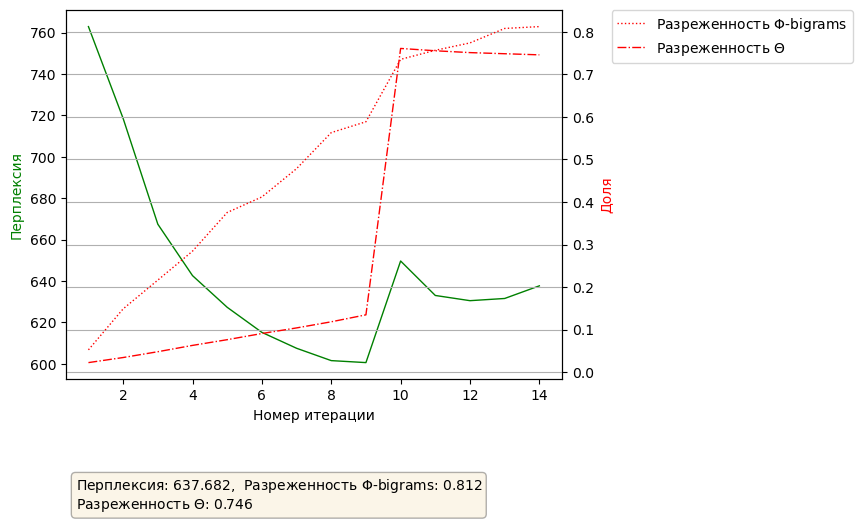

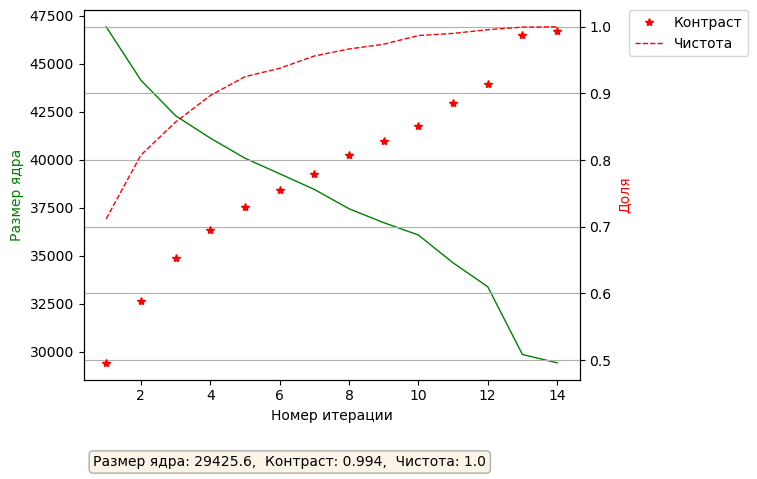

In [23]:
top_num=5
class_ids={'text': 1.0, 'bigrams':1.0}
all_topics, domain_topics, background_topics=SetTopicsNum(top_num, 0)  #SetTopicsNum(d, b)


model=artm.ARTM(topic_names = all_topics,
                    dictionary=main_dictionary,
                    class_ids=class_ids,
                    cache_theta=True,
                    theta_columns_naming='title',
                    seed=5) 


model.initialize(dictionary=main_dictionary)
SetScores(model)

# Set regularization strategy:
model.regularizers.add(artm.DecorrelatorPhiRegularizer('DecorrPhi', gamma=0, topic_names=domain_topics, tau=0.1)) 
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', gamma=0, topic_names=domain_topics, dictionary=main_dictionary, tau=-0.2))
model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', topic_names=domain_topics, tau=-2))
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
plot_figures(model)

/tmp/ipykernel_86984/3755016407.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


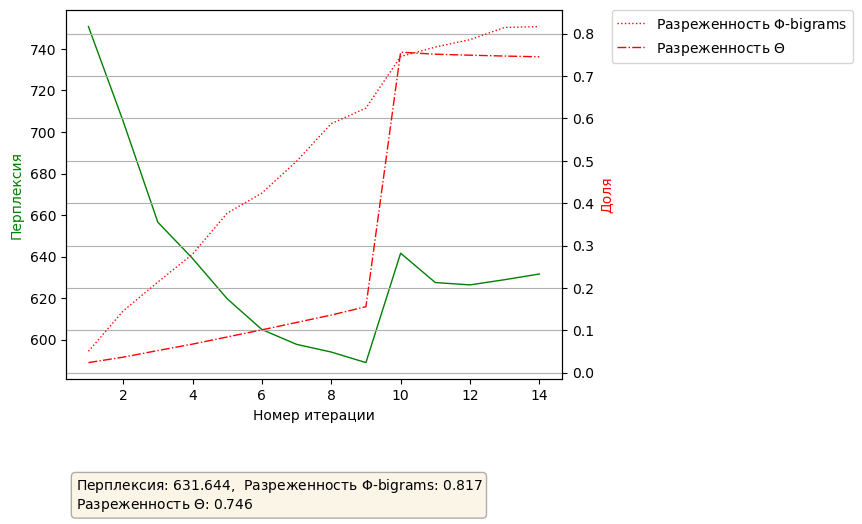

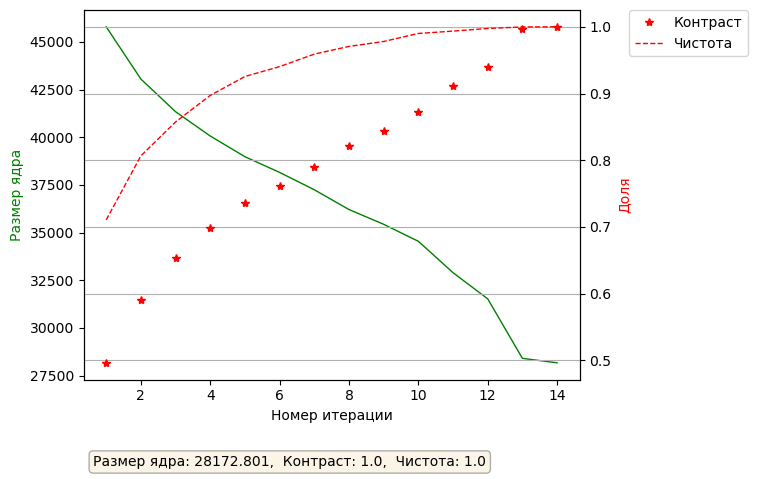

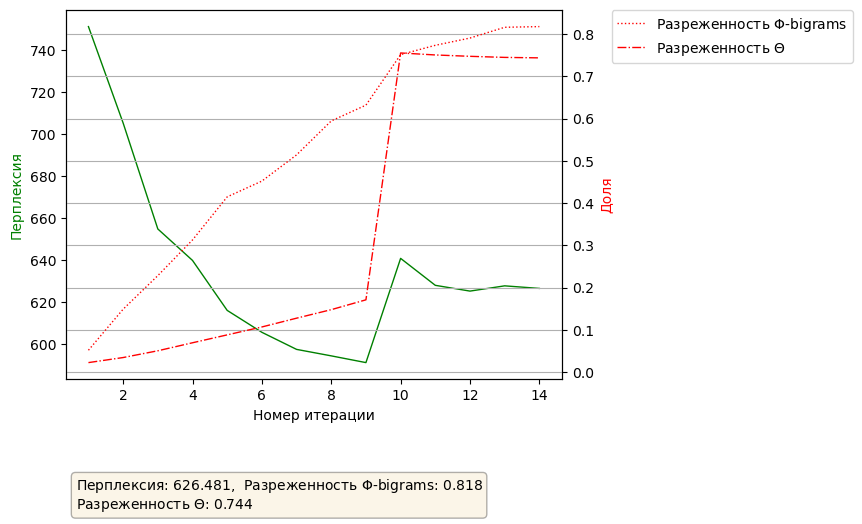

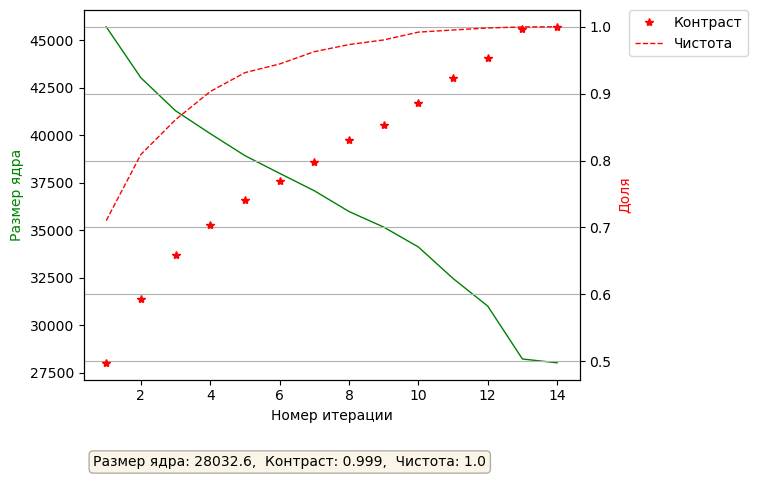

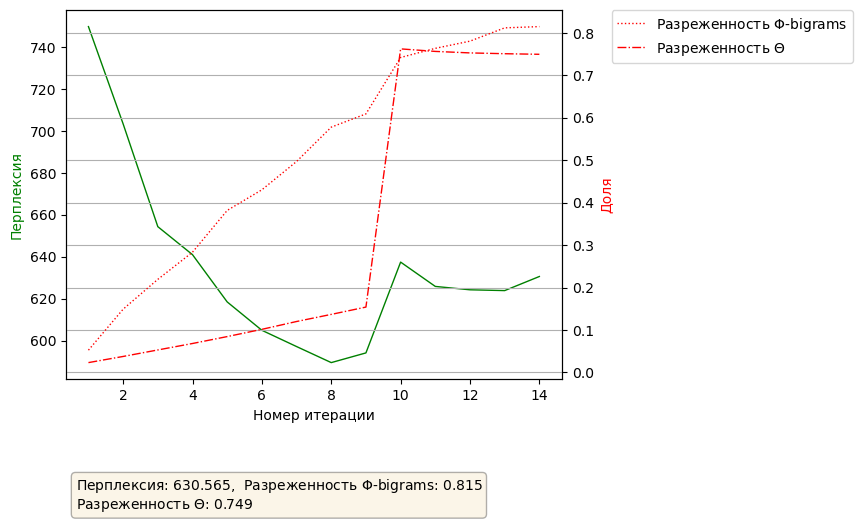

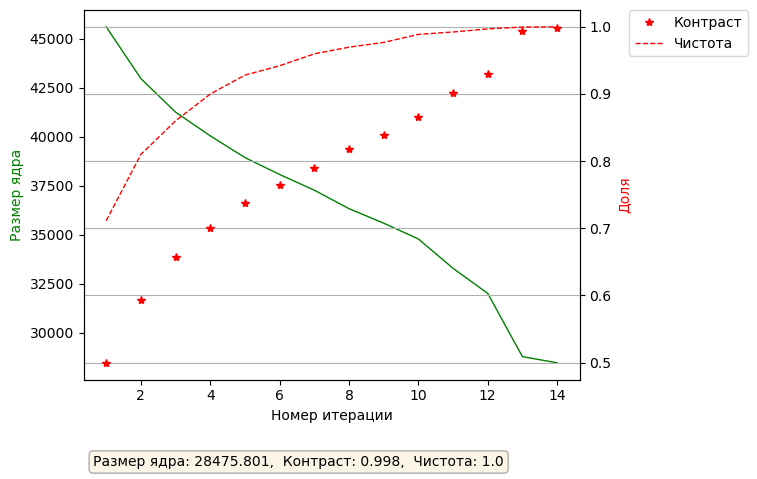

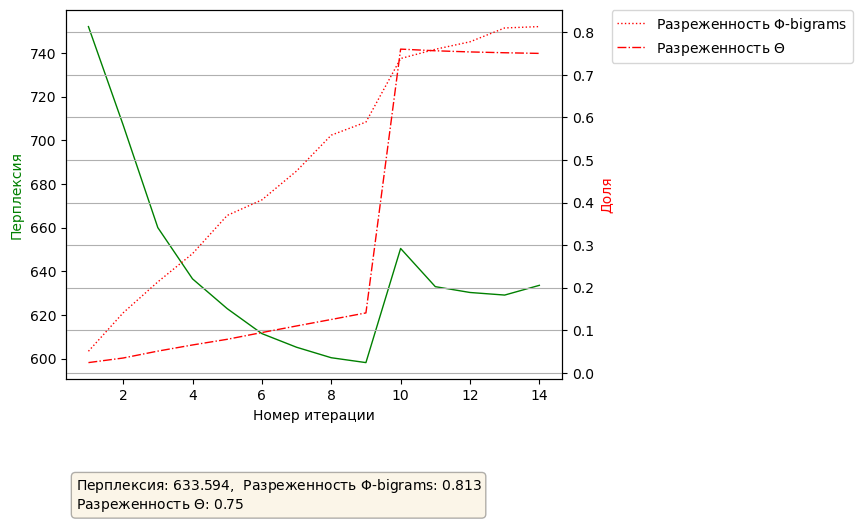

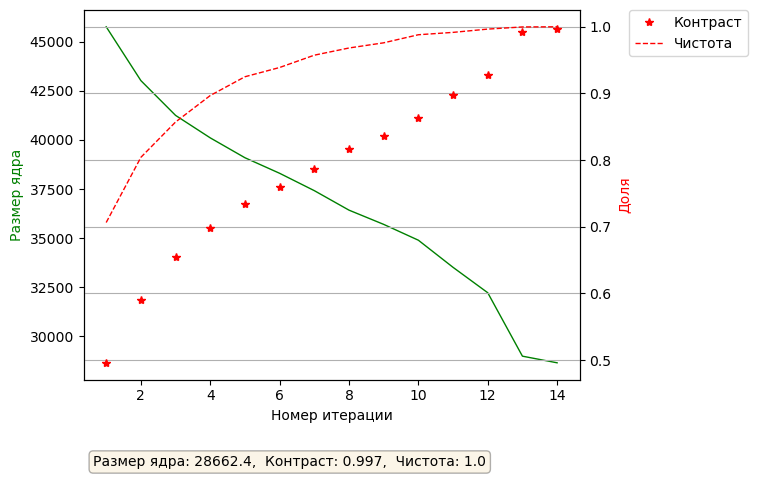

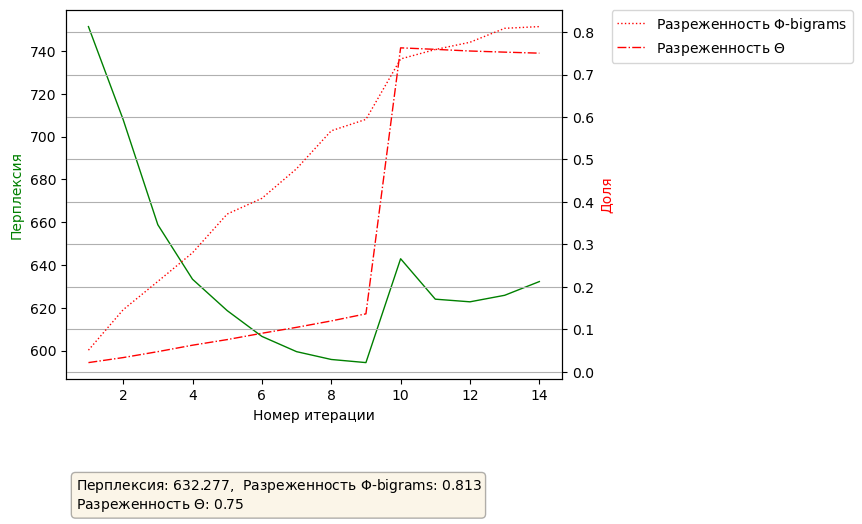

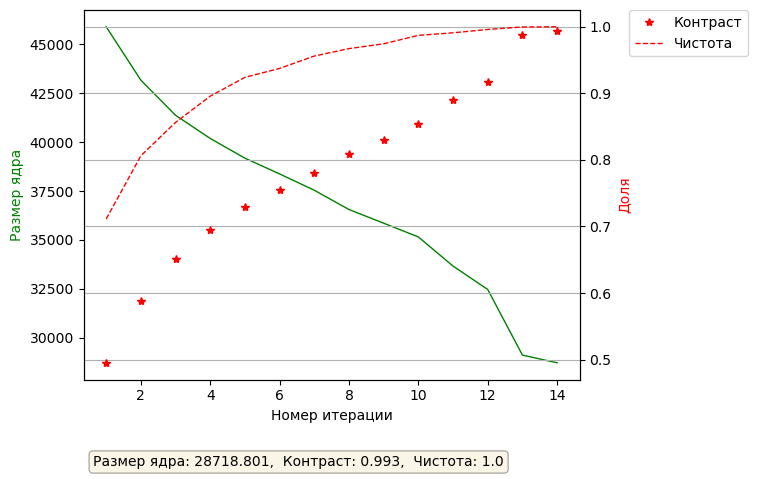

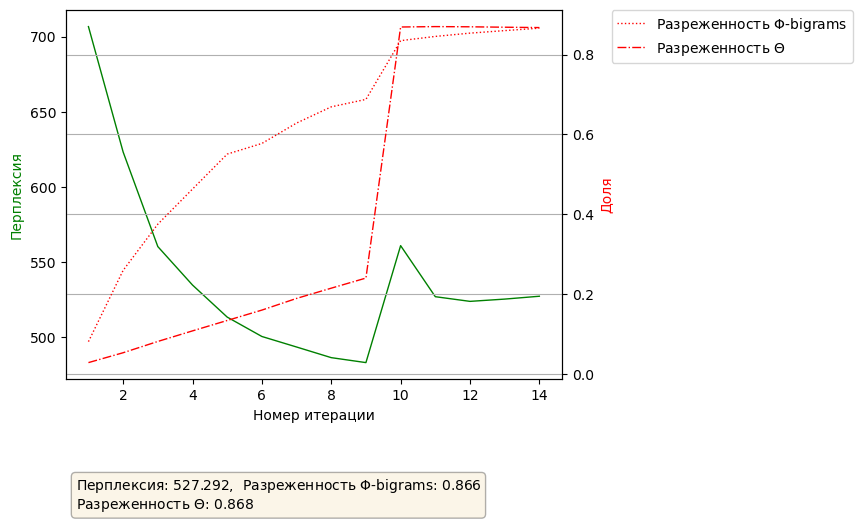

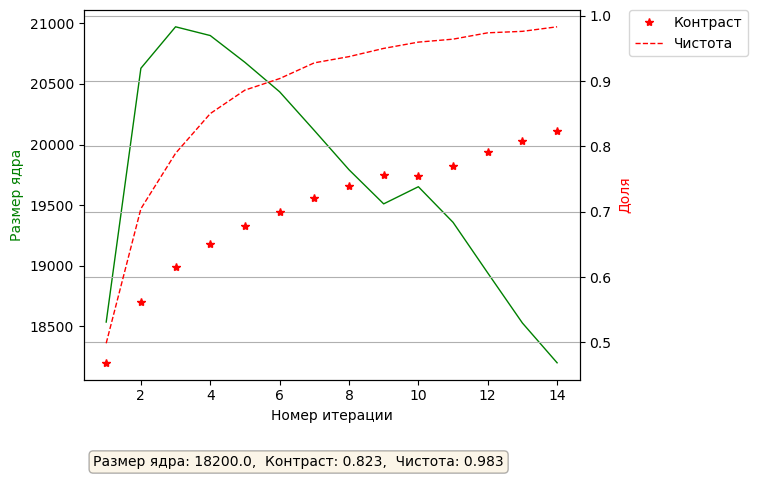

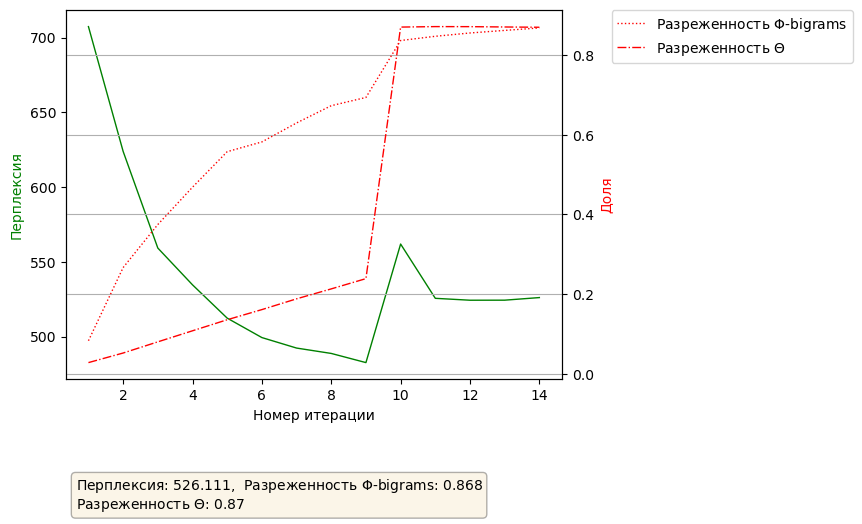

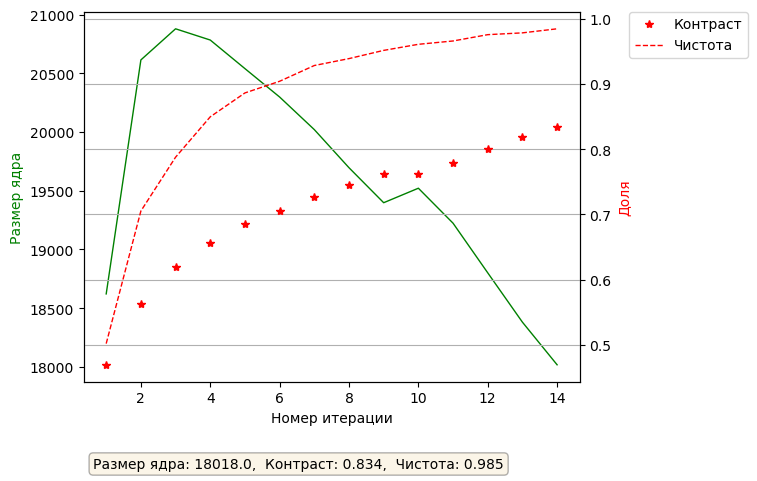

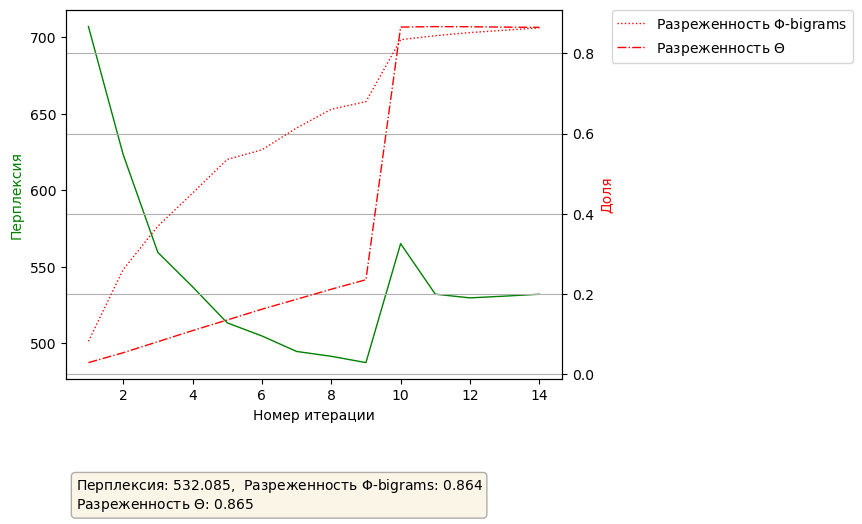

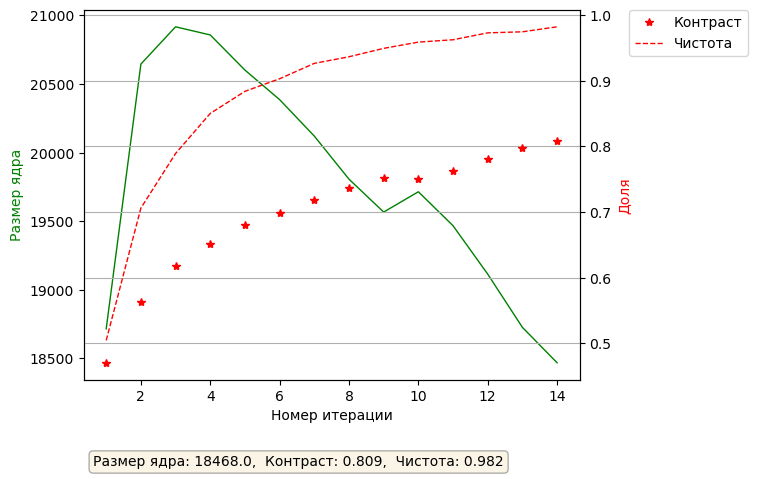

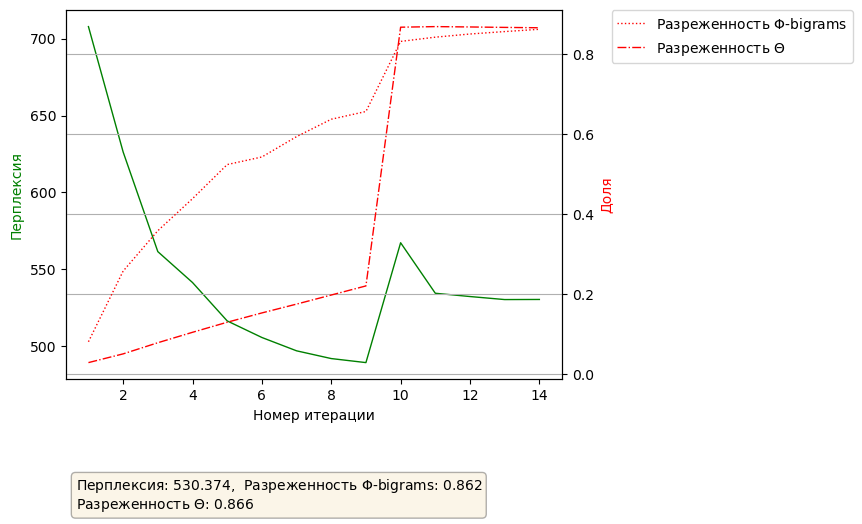

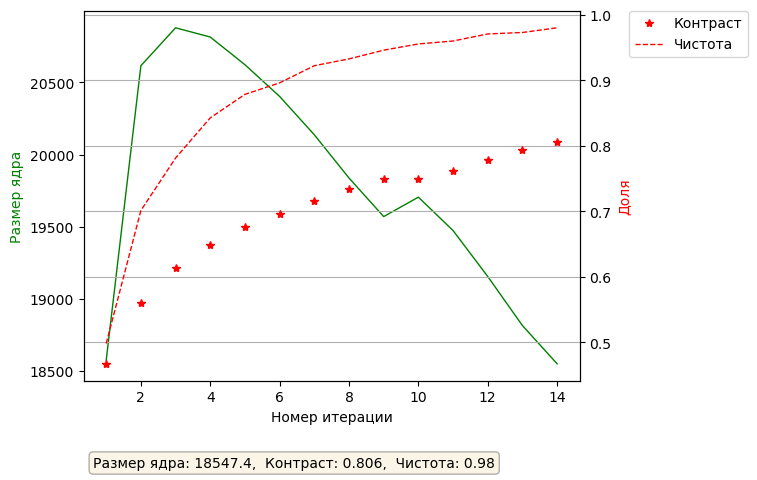

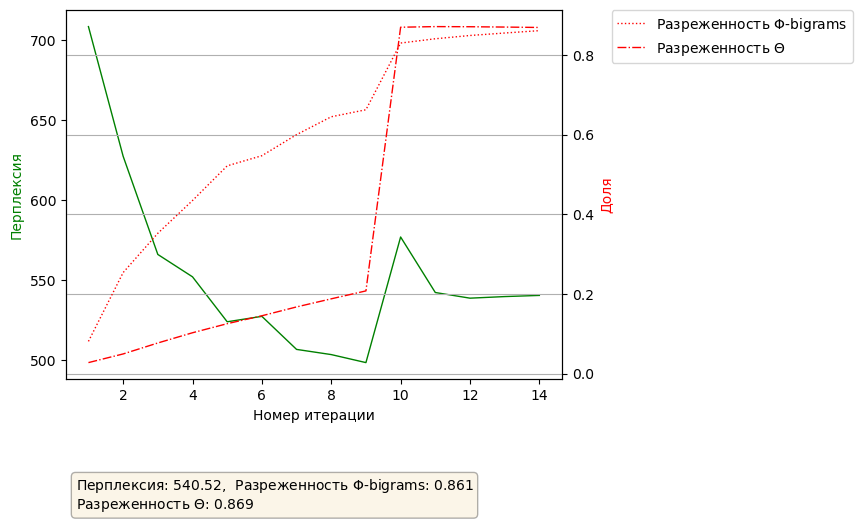

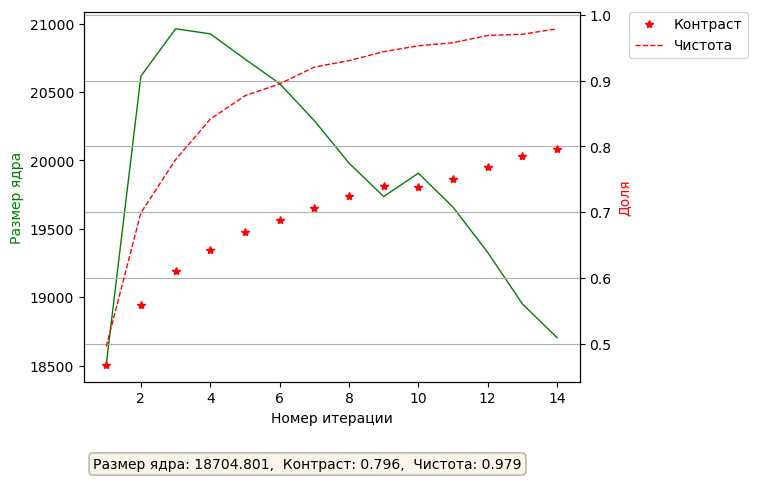

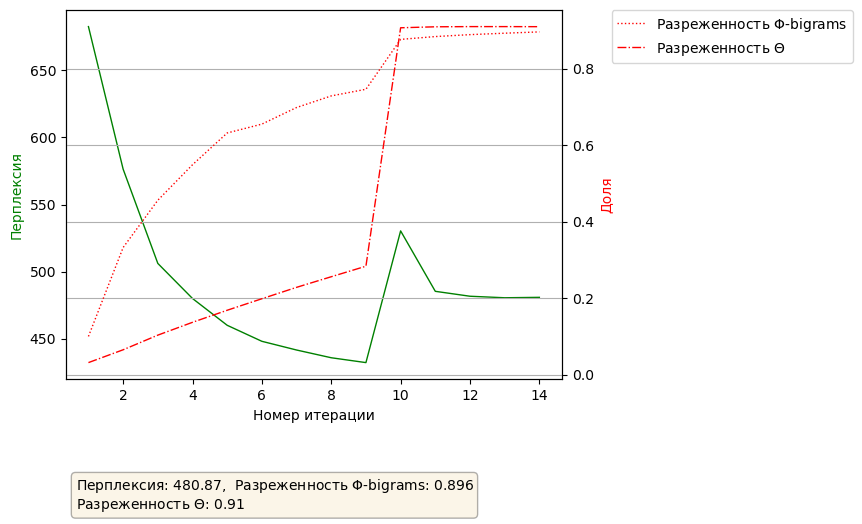

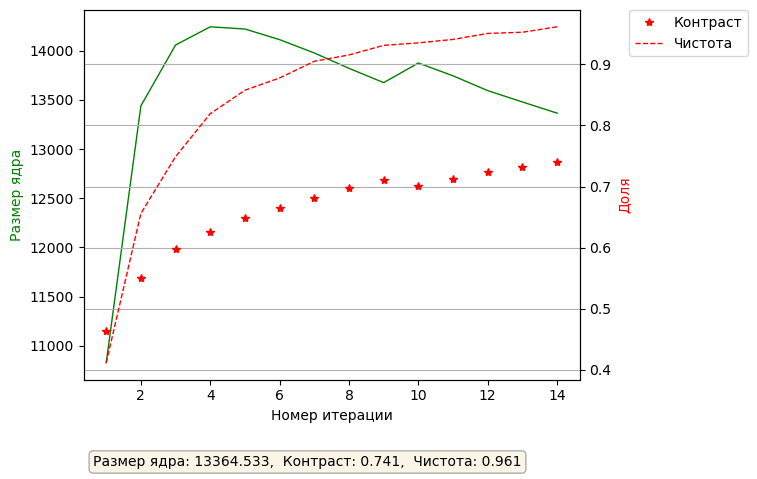

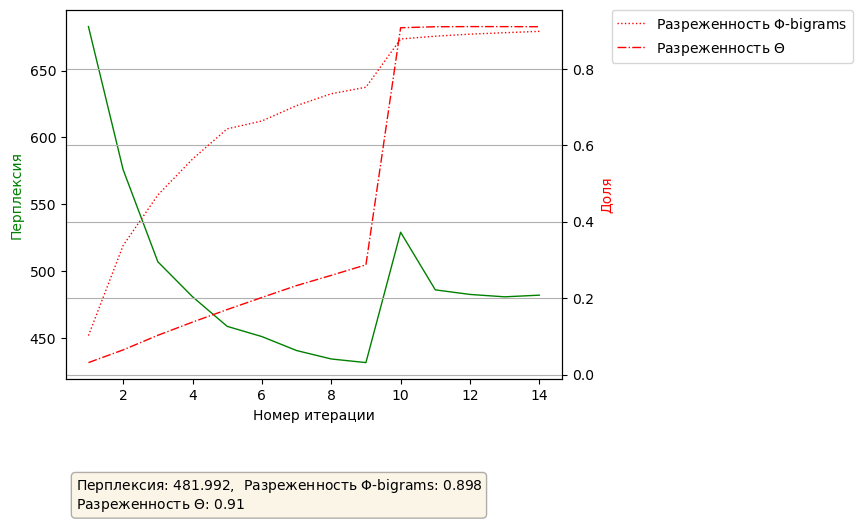

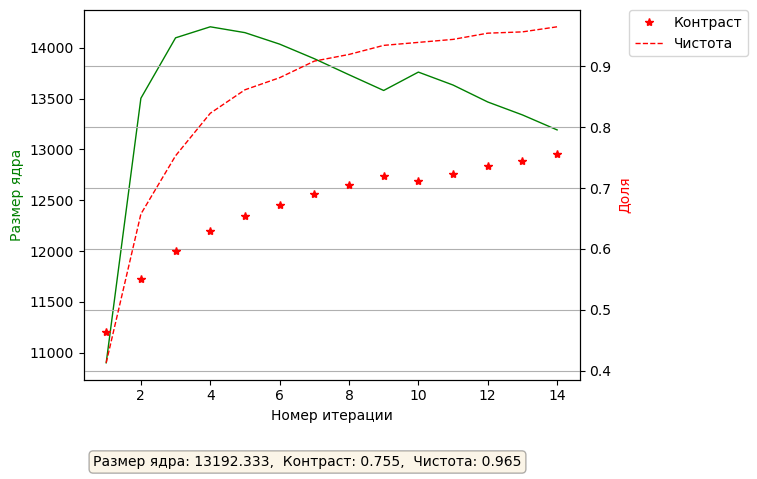

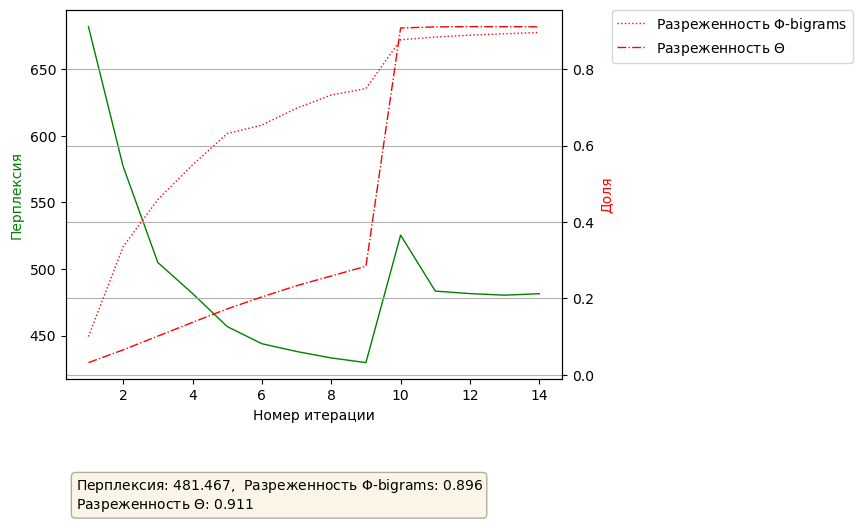

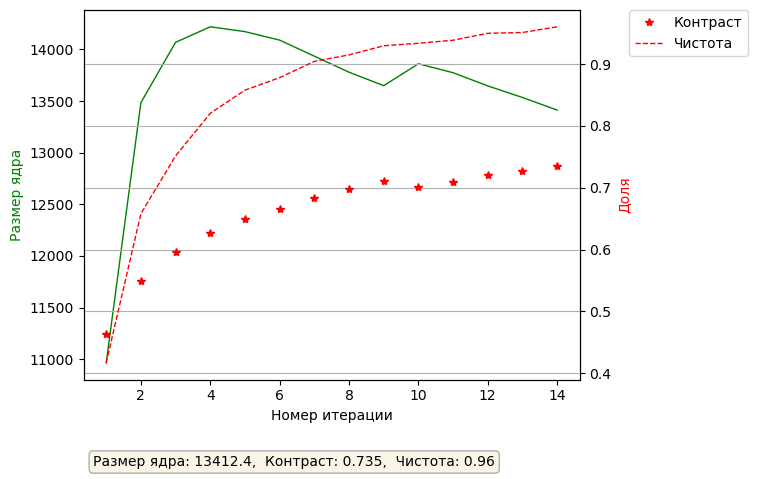

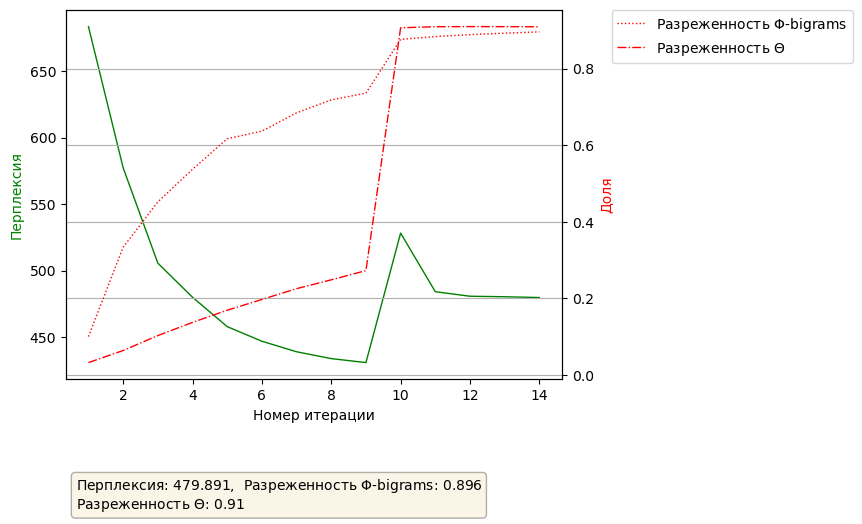

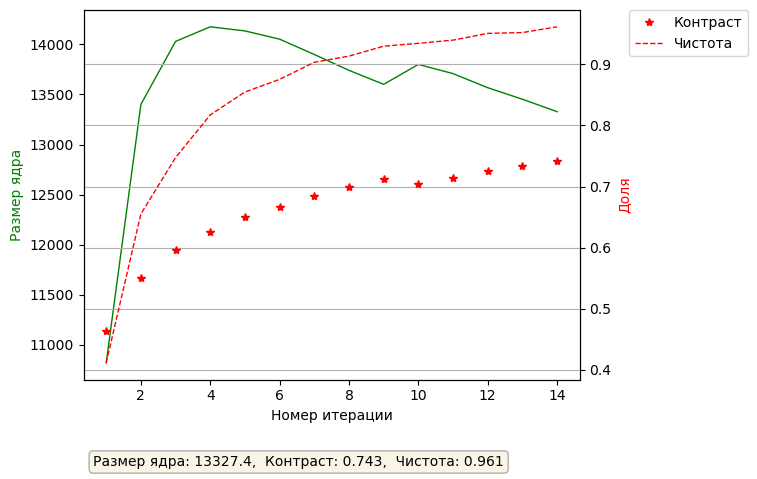

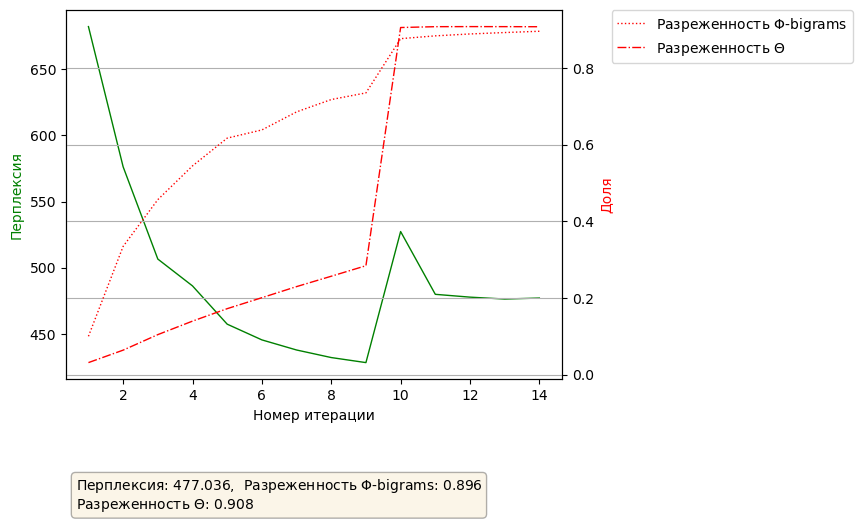

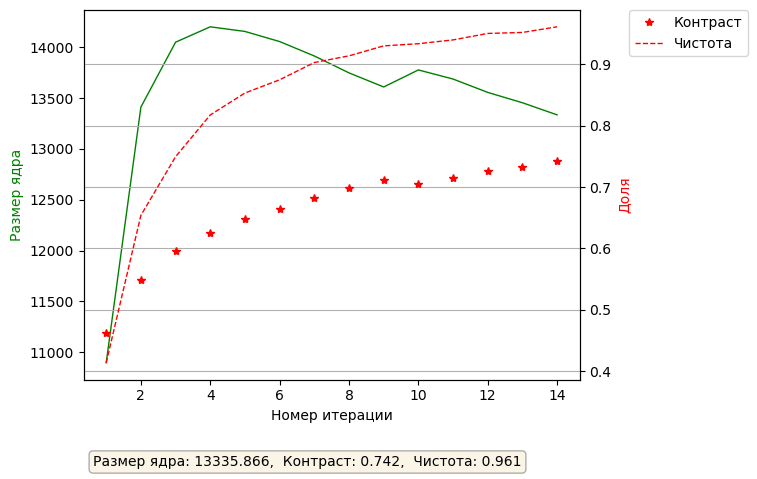

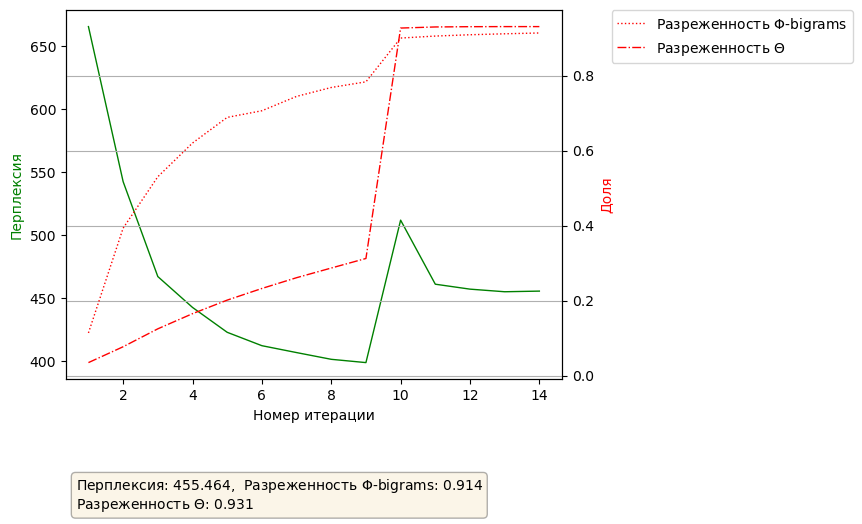

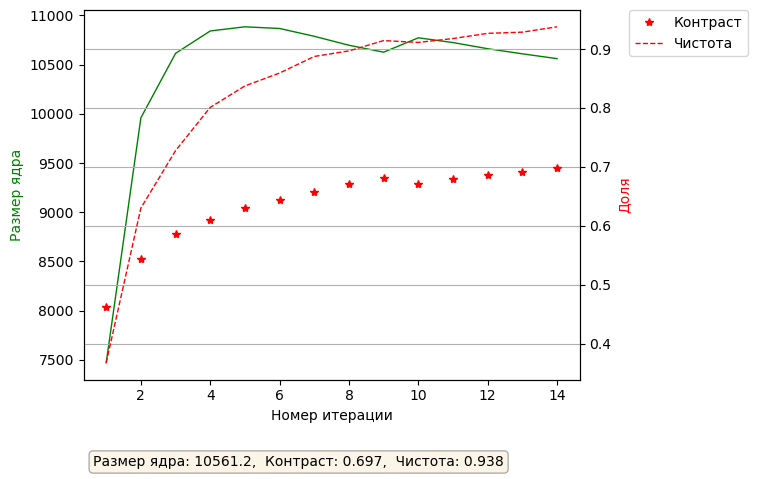

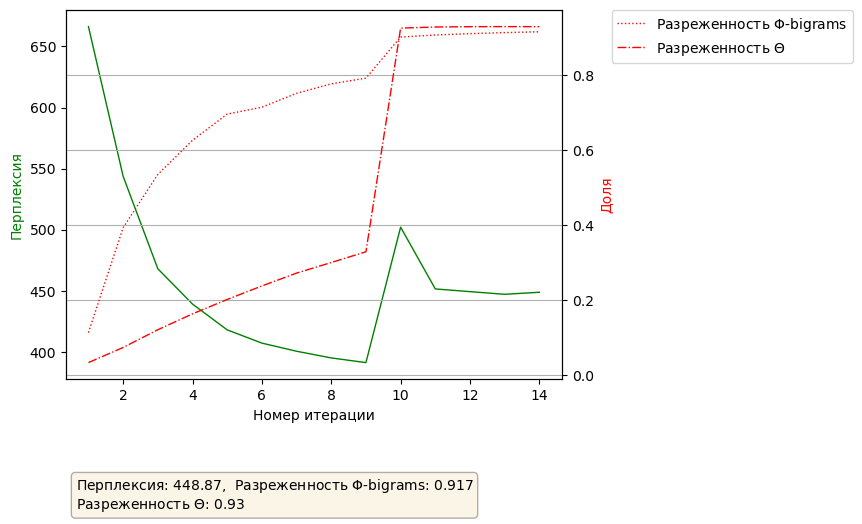

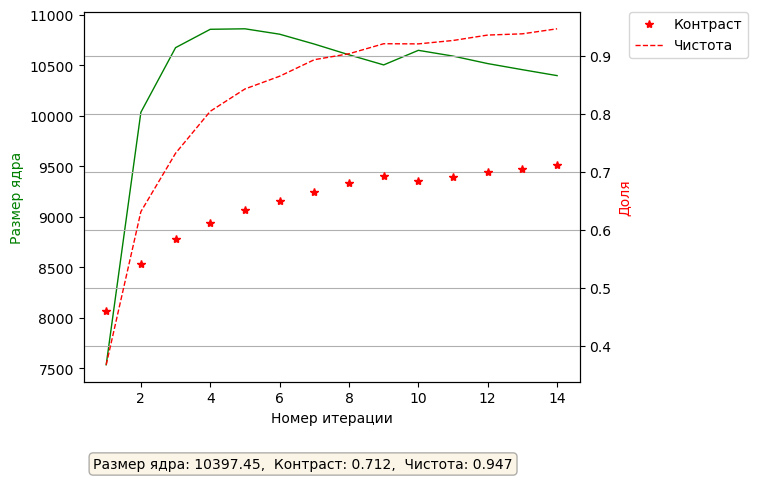

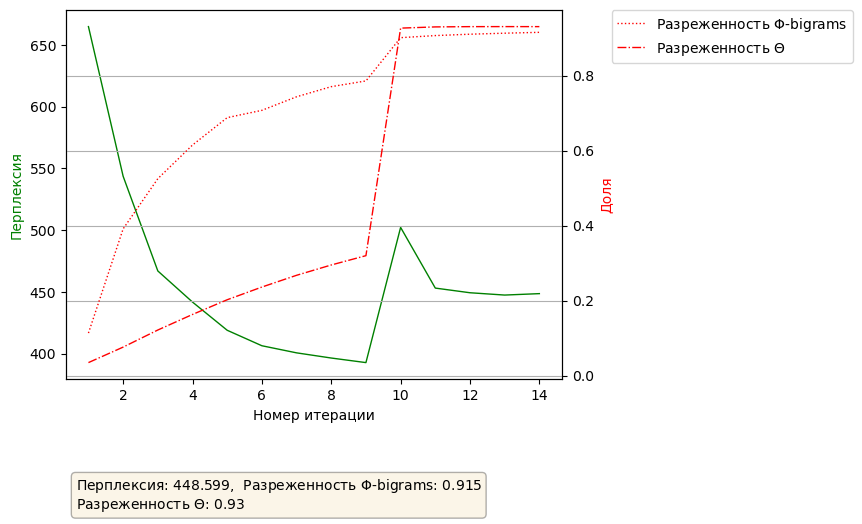

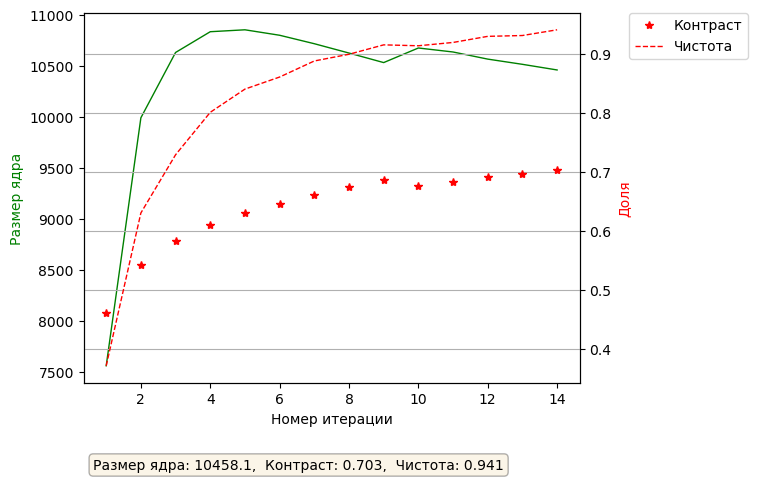

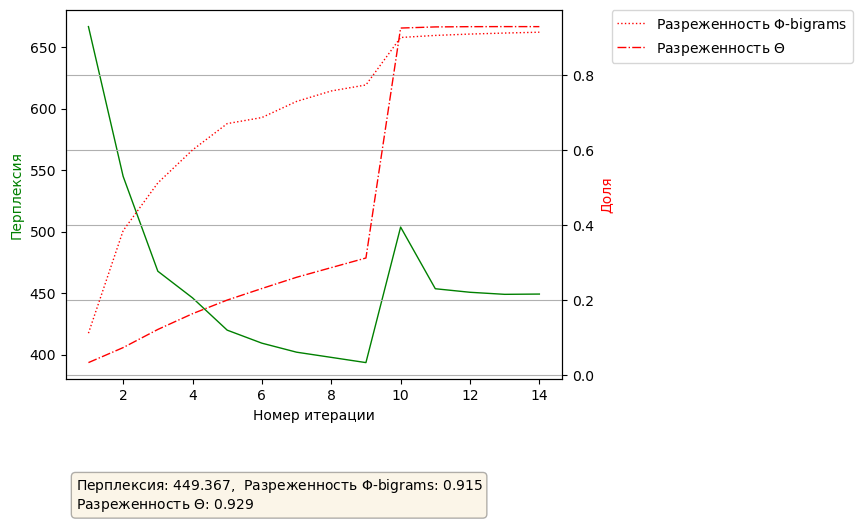

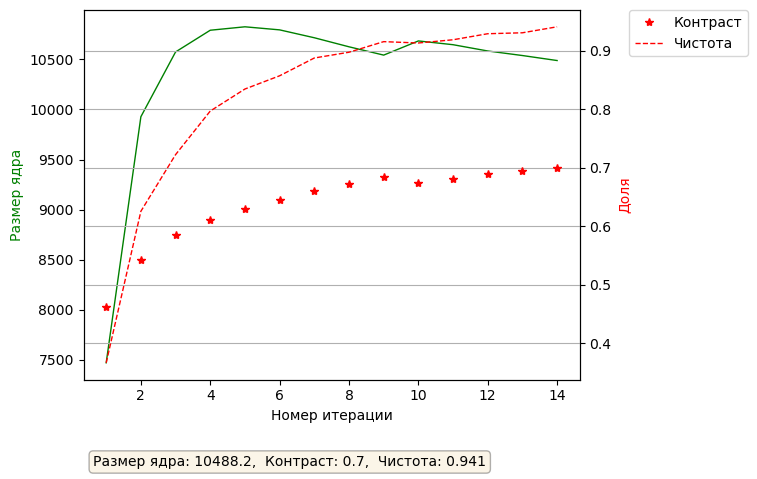

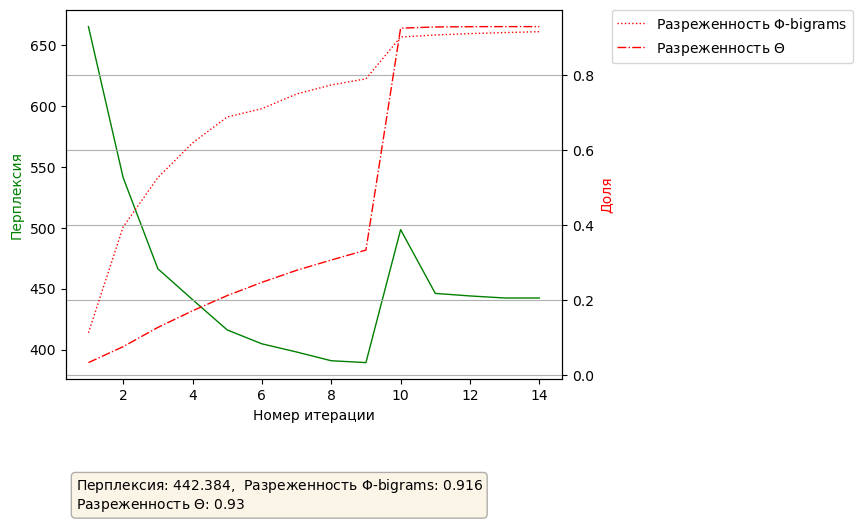

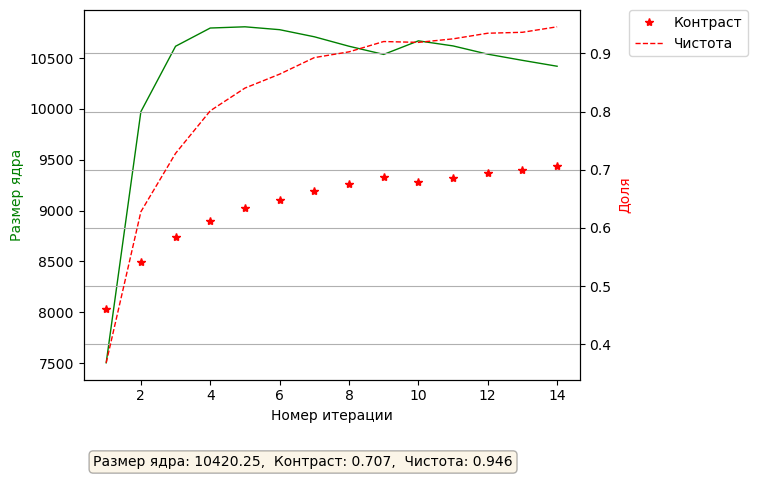

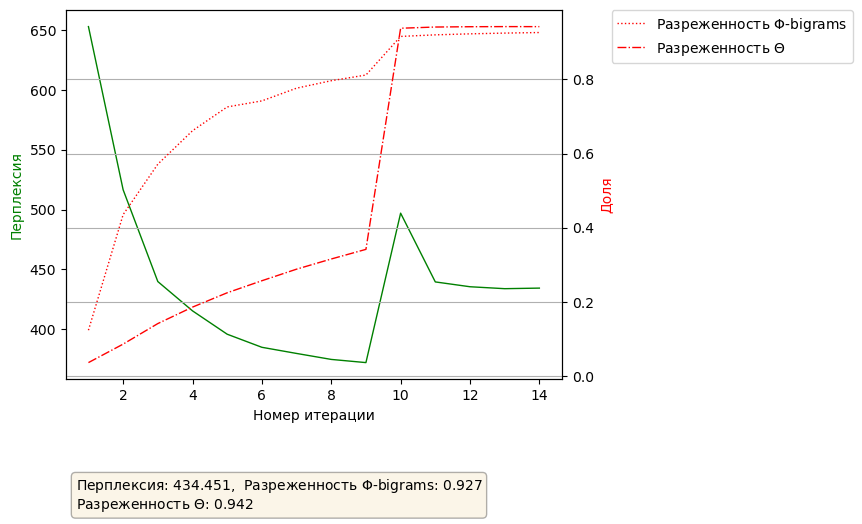

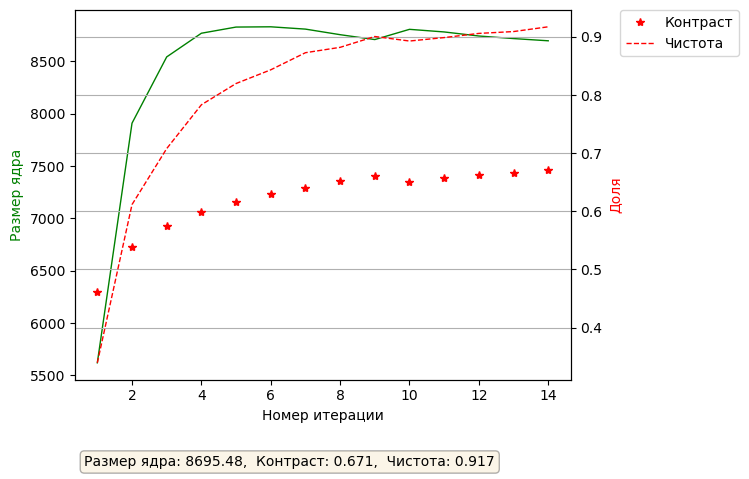

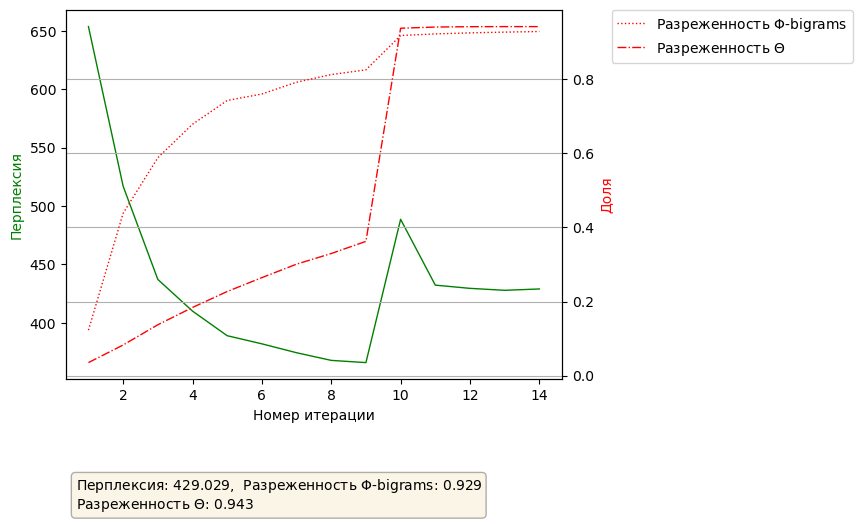

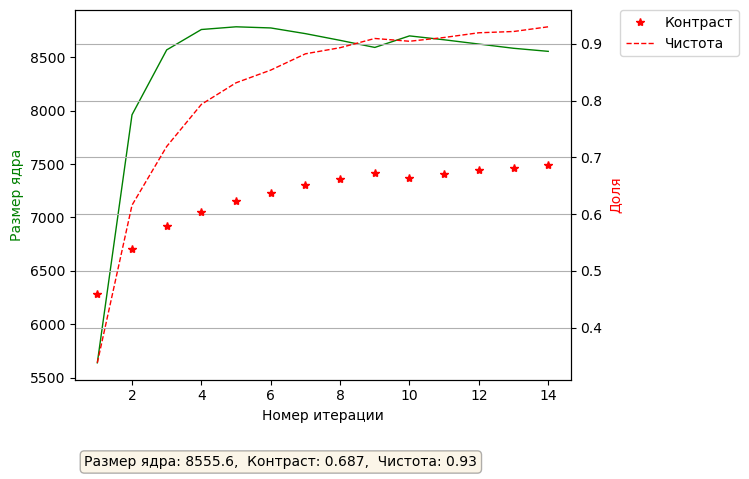

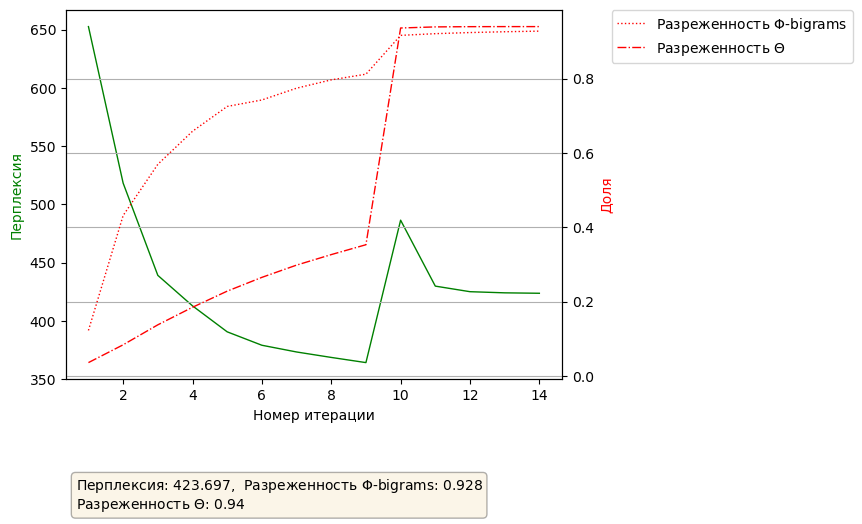

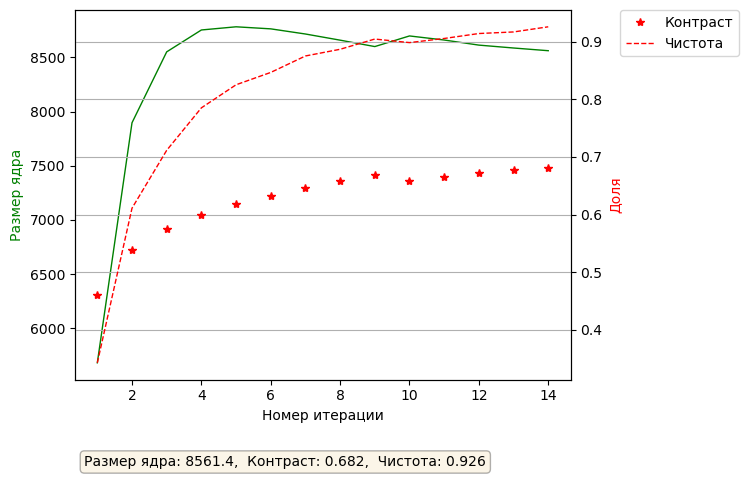

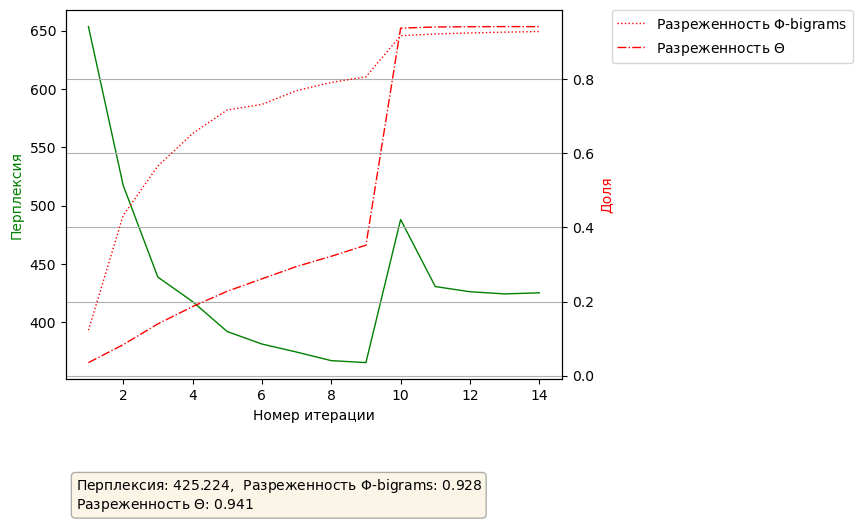

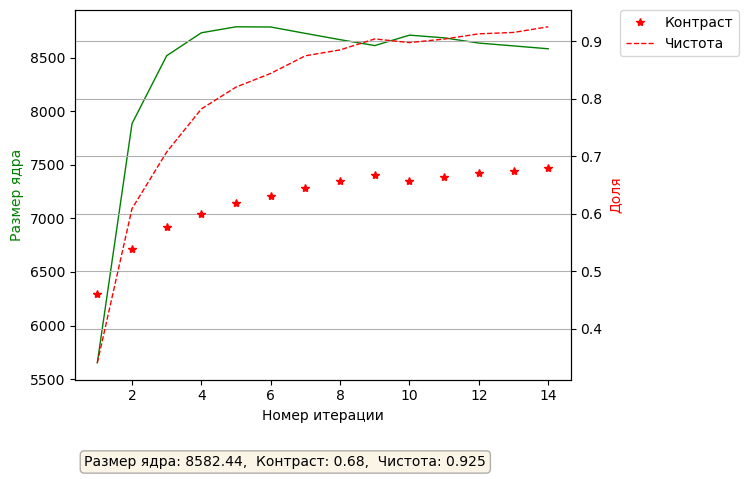

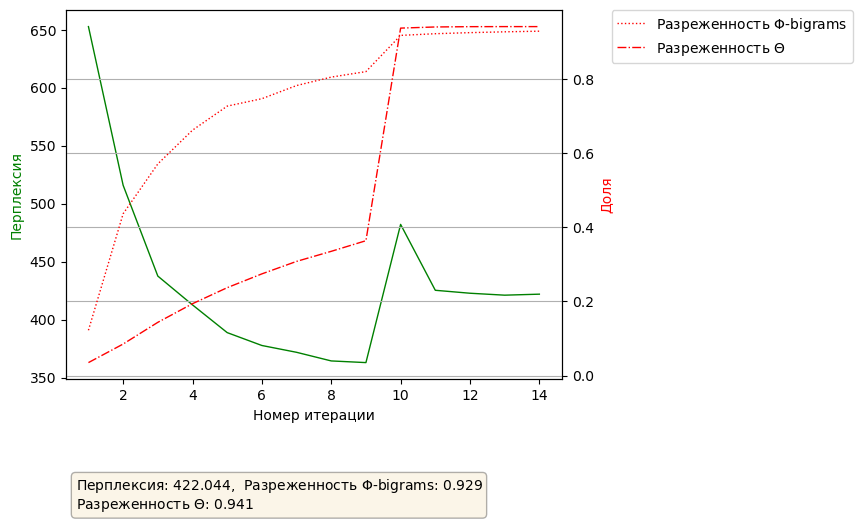

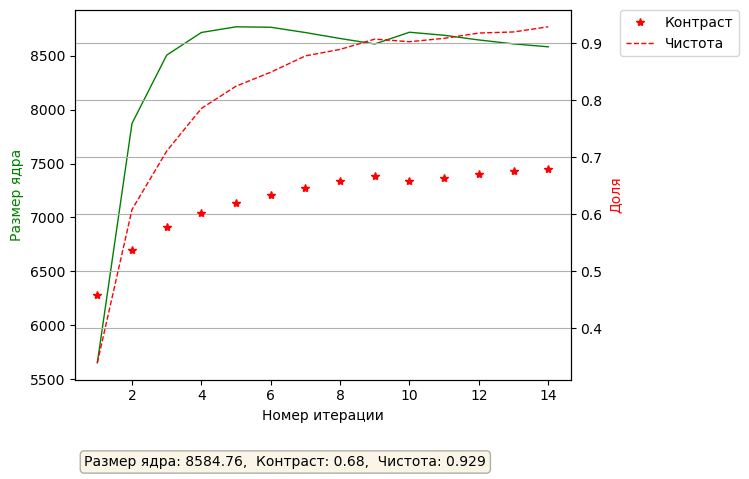

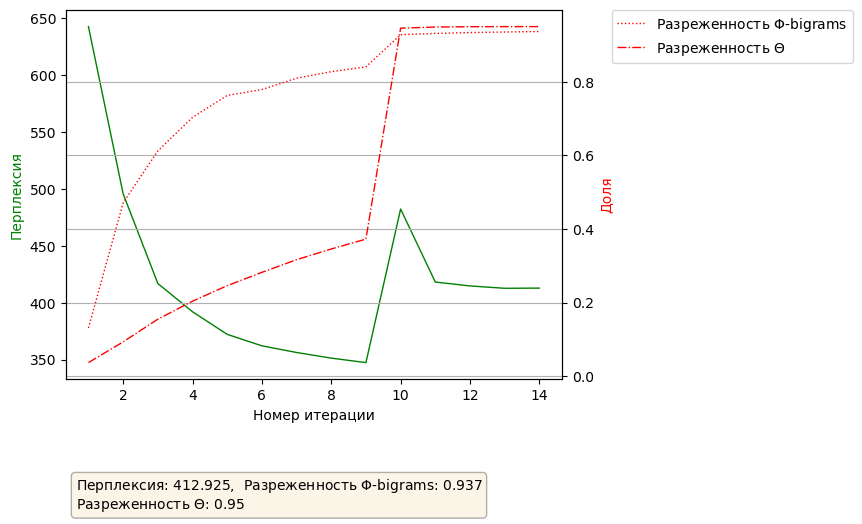

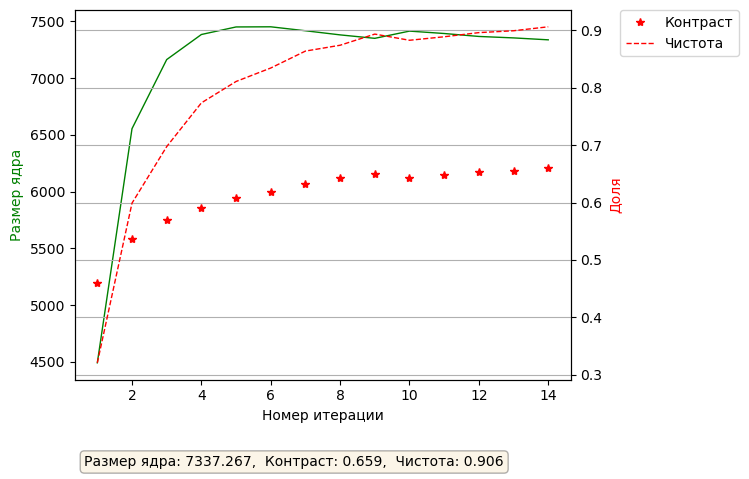

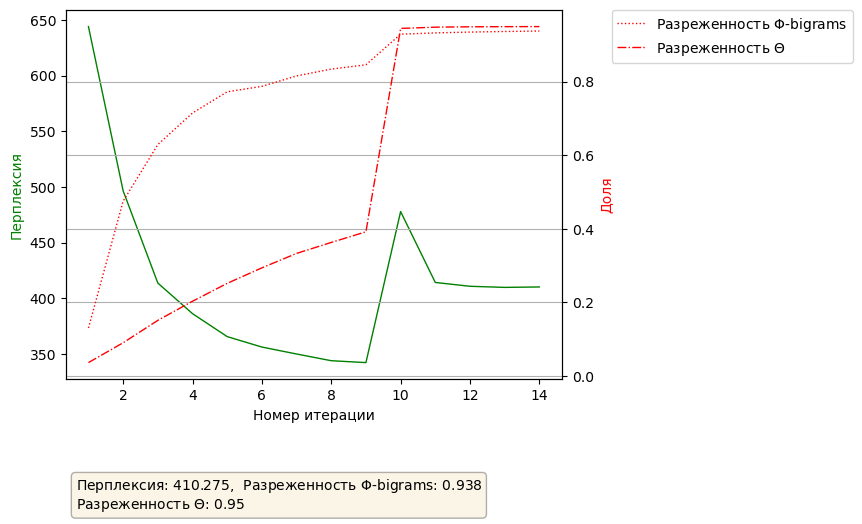

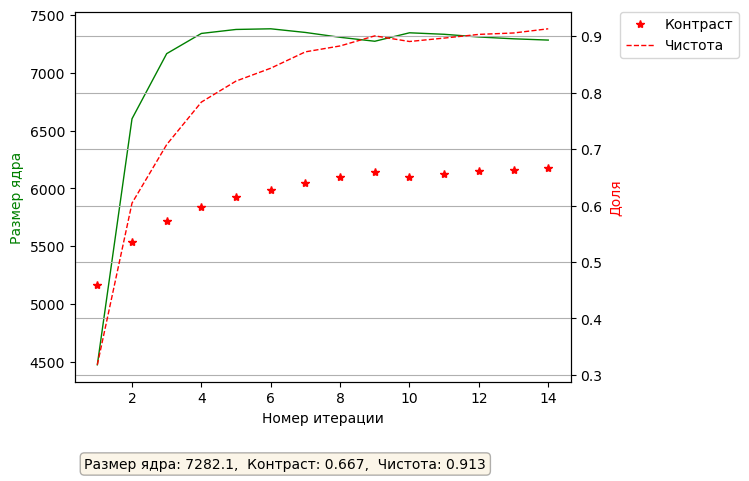

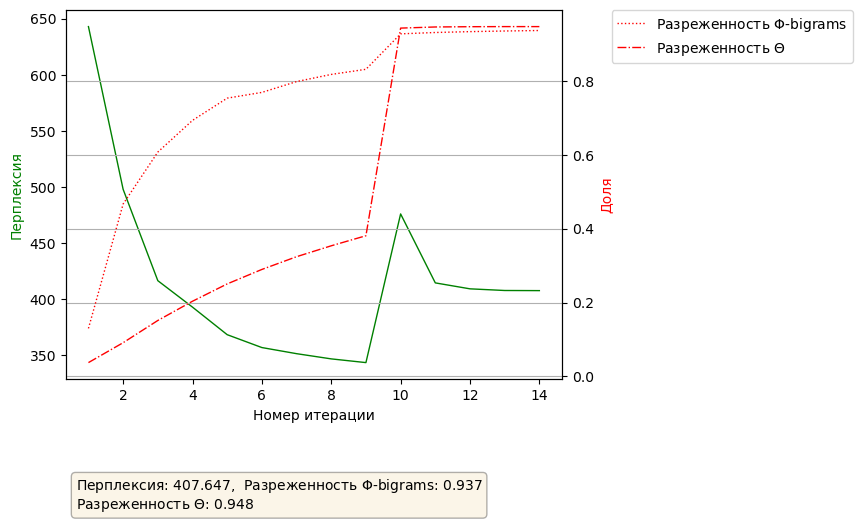

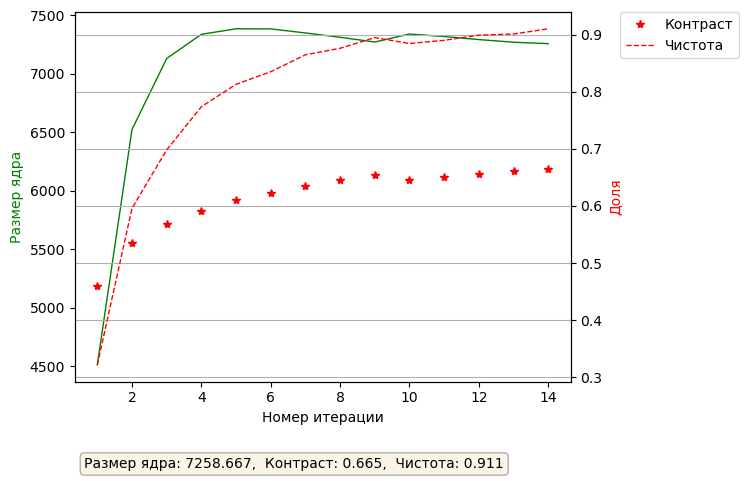

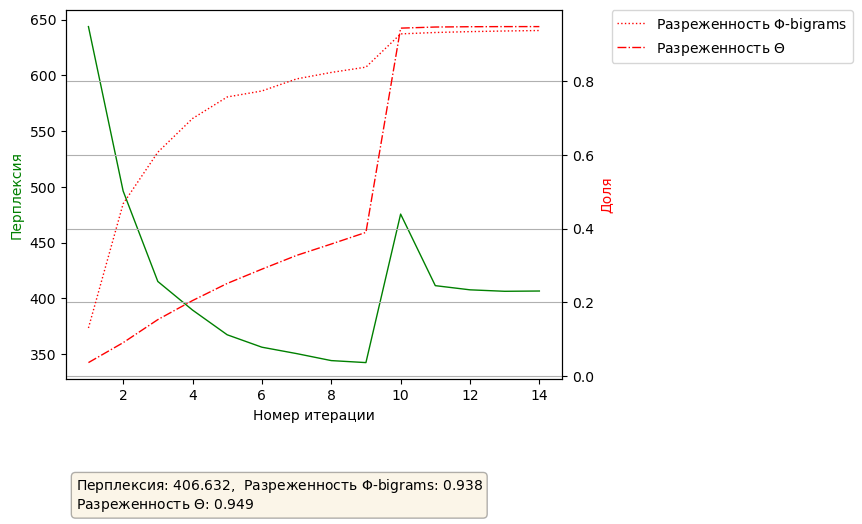

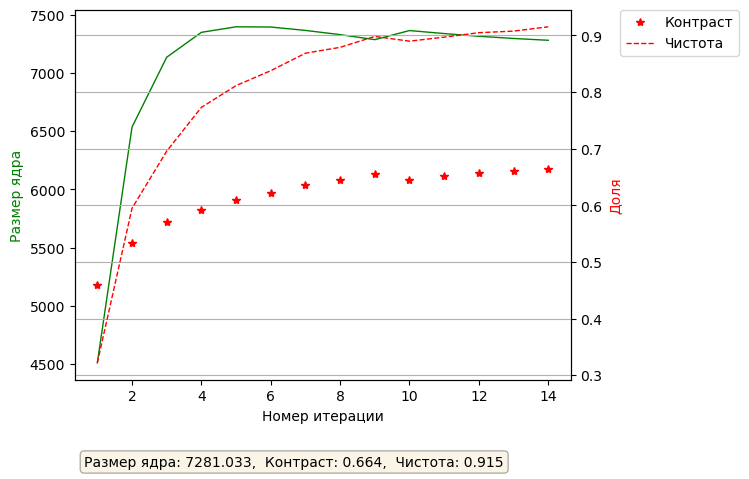

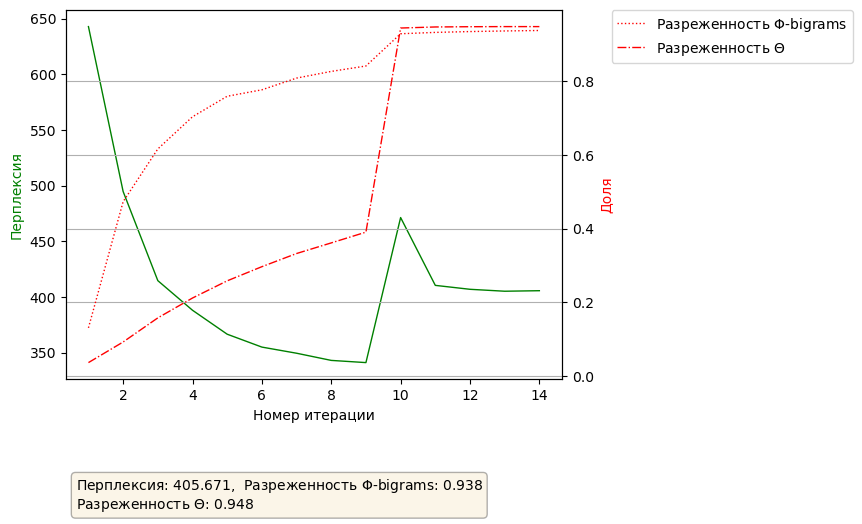

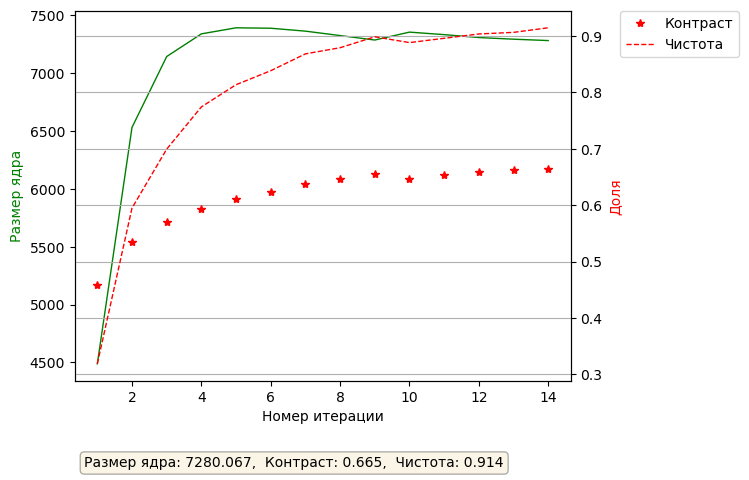

In [53]:
top_num_list=[5, 10, 15, 20, 25, 30]
seed_list=[1, 2, 3, 4, 5]

for top_num in top_num_list:
    
    class_ids={'text': 1.0, 'bigrams':1.0}
    all_topics, domain_topics, background_topics=SetTopicsNum(top_num, 0)  #SetTopicsNum(d, b)

    for seed in seed_list:
        model=artm.ARTM(topic_names = all_topics,
                            dictionary=main_dictionary,
                            class_ids=class_ids,
                            cache_theta=True,
                            theta_columns_naming='title',
                            seed=seed) 


        model.initialize(dictionary=main_dictionary)
        SetScores(model)

        model.regularizers.add(artm.DecorrelatorPhiRegularizer('DecorrPhi', gamma=0, topic_names=domain_topics, tau=0.1)) 
        model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
        model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', gamma=0, topic_names=domain_topics, dictionary=main_dictionary, tau=-0.2))
        model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', topic_names=domain_topics, tau=-2))
        model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)

        TopicTrackerTable_cur, rows_num=ReadTableResults()
        CreateFilesWithTopics(rows_num)
        CallingResultsProcedures(model)

In [26]:
top_tokens = model.score_tracker["Bigrams_Top10_Tokens"]  #References_Top10  Bigrams_Top10_Tokens Text_Top10_Tokens #Authors_Top15

for topic_name in model.topic_names:
    token_line_list=[]
    print (topic_name)
    for (token, weight) in zip(top_tokens.last_tokens[topic_name],
                               top_tokens.last_weights[topic_name]):    
         token_line_list.append(token)
        #print token  #, '-', round(weight,3)
    print (', '.join(token_line_list))  

d1
большой_весь, это_просто, получить_достижение, любить_свой, каждый_свой, весь_свой, это_сделать, не_сказать, не_менее, свой_друг
d2
друг_друг, ещё_не, первомайский_библиотека, каждый_человек, друг_не, знать_это, человек_это, дорогой_друг, это_ещё, знать_всё
d3
ромик_кадр, инстаребёнок_инстадетиекб, инстадетиекб_детиекб, санкт_петербург, кадр_инстаребёнок, большой_спасибо, год_месяц, инстамама_инстамамаекб, детиекб_инстамама, инстамамаекб_мамаекб
d4
спасибо_весь, это_очень, весь_день, не_очень, хороший_настроение, день_не, очень_очень, весь_друг, давно_не, сегодня_день
d5
каждый_день, счастие_это, чехол_прага, цена_грн, наш_любимый, весь_праздник, коли_не, повен_грн, як_сть, посмотреть_видео
d6
не_нужный, не_понимать, не_уметь, всё_время, хороший_не, жить_не, ваш_жизнь, любимый_человек, хороший_человек, не_ждать
d7
сцена_театр, мюзик_холл, театр_мюзик, писать_лс, абакан_сорск, писать_личка, ваш_лаванда, лишний_вес, обмен_вещество, фрагмент_спектакль
d8
самый_хороший, не_верить, прямо

In [120]:
TopicTrackerTable_cur = pd.read_csv(results_dir+model_results_file)
TopicTrackerTable_cur

num  topics num  seed                      class_ids  steps num  \
0     1           5     1  {'text': 1.0, 'bigrams': 1.0}         15   
1     2           5     2  {'text': 1.0, 'bigrams': 1.0}         15   
2     3           5     3  {'text': 1.0, 'bigrams': 1.0}         15   
3     4           5     4  {'text': 1.0, 'bigrams': 1.0}         15   
4     5           5     5  {'text': 1.0, 'bigrams': 1.0}         15   
5     6          10     1  {'text': 1.0, 'bigrams': 1.0}         15   
6     7          10     2  {'text': 1.0, 'bigrams': 1.0}         15   
7     8          10     3  {'text': 1.0, 'bigrams': 1.0}         15   
8     9          10     4  {'text': 1.0, 'bigrams': 1.0}         15   
9    10          10     5  {'text': 1.0, 'bigrams': 1.0}         15   
10   11          15     1  {'text': 1.0, 'bigrams': 1.0}         15   
11   12          15     2  {'text': 1.0, 'bigrams': 1.0}         15   
12   13          15     3  {'text': 1.0, 'bigrams': 1.0}         15   
13   14          15     4  {'text': 1.0, 'bigrams': 1.0}         15   
14   15          15     5  {'text': 1.0, 'bigrams': 1.0}         15   
15   16          20     1  {'text': 1.0, 'bigrams': 1.0}         15   
16   17          20     2  {'text': 1.0, 'bigrams': 1.0}         15   
17   18          20     3  {'text': 1.0, 'bigrams': 1.0}         15   
18   19          20     4  {'text': 1.0, 'bigrams': 1.0}         15   
19   20          20     5  {'text': 1.0, 'bigrams': 1.0}         15   
20   21          25     1  {'text': 1.0, 'bigrams': 1.0}         15   
21   22          25     2  {'text': 1.0, 'bigrams': 1.0}         15   
22   23          25     3  {'text': 1.0, 'bigrams': 1.0}         15   
23   24          25     4  {'text': 1.0, 'bigrams': 1.0}         15   
24   25          25     5  {'text': 1.0, 'bigrams': 1.0}         15   
25   26          30     1  {'text': 1.0, 'bigrams': 1.0}         15   
26   27          30     2  {'text': 1.0, 'bigrams': 1.0}         15   
27   28          30     3  {'text': 1.0, 'bigrams': 1.0}         15   
28   29          30     4  {'text': 1.0, 'bigrams': 1.0}         15   
29   30          30     5  {'text': 1.0, 'bigrams': 1.0}         15   

                                             strategy  perplexity  \
0   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       774.0   
1   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       757.0   
2   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       754.0   
3   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       786.0   
4   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       757.0   
5   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       607.0   
6   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       615.0   
7   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       616.0   
8   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       615.0   
9   [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       601.0   
10  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       544.0   
11  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       547.0   
12  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       542.0   
13  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       540.0   
14  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       532.0   
15  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       503.0   
16  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       505.0   
17  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       499.0   
18  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       506.0   
19  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       494.0   
20  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       471.0   
21  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       475.0   
22  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       461.0   
23  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       473.0   
24  [DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...       467.0   
25  [Dec

In [126]:
import sys
!{sys.executable} -m pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 38.8 MB/s eta 0:00:0000:0100:01


IndexError: list index out of range

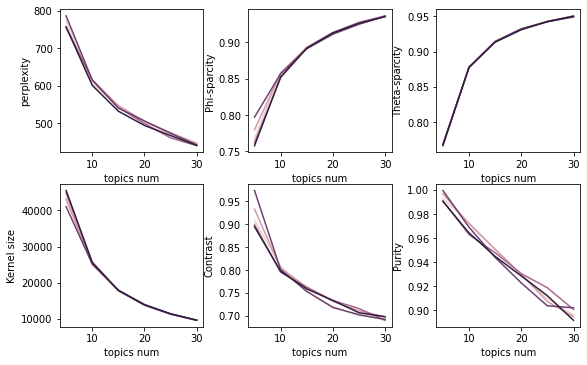

In [193]:
import seaborn as sns
ncols=2
nrows=3
fig, axs = plt.subplots(ncols, nrows, figsize=(8,5))
y_list=['perplexity', 'Phi-sparcity', 'Theta-sparcity', 'Kernel size', 'Contrast', 'Purity']
plt.tight_layout()

it=0
for row in range(nrows+1):
    for col in range(ncols+1):
    
    
    
#         print (col, row)
#         print (it)
        sns.lineplot(x="topics num", y=y_list[it], data=TopicTrackerTable_cur, hue="seed", ax=axs[row, col], legend = False)
        it=it+1
        
# sns.lineplot(x="topics num", y="perplexity", data=TopicTrackerTable_cur, hue="seed", ax=axs[0, 0], legend = False)
# sns.lineplot(x="topics num", y="Phi-sparcity", data=TopicTrackerTable_cur, hue="seed", ax=axs[0, 1], legend = False)
# sns.lineplot(x="topics num", y="Theta-sparcity", data=TopicTrackerTable_cur, hue="seed", ax=axs[0, 2], legend = False)
# sns.lineplot(x="topics num", y="Kernel size", data=TopicTrackerTable_cur, hue="seed", ax=axs[1, 0], legend = False)
# sns.lineplot(x="topics num", y="Contrast", data=TopicTrackerTable_cur, hue="seed", ax=axs[1,1], legend = False)
# sns.lineplot(x="topics num", y="Purity", data=TopicTrackerTable_cur, hue="seed", ax=axs[1,2], legend = False)


In [218]:
phi_text = model.get_phi(class_ids = ['bigrams'])

In [220]:
phi_text.sort_values(by=['d2'], ascending=False)[:10]

d1        d2   d3   d4   d5
(bigrams, цена_грн)           0.0  0.018276  0.0  0.0  0.0
(bigrams, размер_размер)      0.0  0.017347  0.0  0.0  0.0
(bigrams, кг_шт)              0.0  0.015914  0.0  0.0  0.0
(bigrams, шт_кг)              0.0  0.011334  0.0  0.0  0.0
(bigrams, код_новиночка)      0.0  0.011113  0.0  0.0  0.0
(bigrams, каблук_смотреть)    0.0  0.010142  0.0  0.0  0.0
(bigrams, материал_эко)       0.0  0.009276  0.0  0.0  0.0
(bigrams, новиночка_наличие)  0.0  0.008787  0.0  0.0  0.0
(bigrams, цвет_чёрный)        0.0  0.008064  0.0  0.0  0.0
(bigrams, снова_наличие)      0.0  0.007895  0.0  0.0  0.0

In [216]:
# Импортируем из модели Тета
theta = model.get_theta()
theta_tr = theta.transpose(copy=True)

In [224]:
q=theta_tr.sort_values(by=['d2'], ascending=False)
q

d1   d2   d3   d4   d5
370256680_95     0.0  1.0  0.0  0.0  0.0
355463026_12718  0.0  1.0  0.0  0.0  0.0
355463026_12741  0.0  1.0  0.0  0.0  0.0
355463026_12740  0.0  1.0  0.0  0.0  0.0
355463026_12739  0.0  1.0  0.0  0.0  0.0
...              ...  ...  ...  ...  ...
447190612_169    0.0  0.0  0.0  0.0  0.0
447190612_171    0.0  0.0  0.0  0.0  0.0
447190612_172    0.0  0.0  0.0  1.0  0.0
447190612_173    0.0  0.0  0.0  0.0  0.0
506145605_373    0.0  0.0  0.0  1.0  0.0

[144670 rows x 5 columns]

In [225]:
# Загрузка файла с исходными данными
import pandas as pd
folder='../results_from_rnd_walls/data/'
file_name='wall-rnd-posts_text.csv'

df=pd.read_csv(folder+file_name, sep="|", encoding ='utf-8', index_col=False)
# df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

/tmp/ipykernel_710/1193032667.py:6: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(folder+file_name, sep="|", encoding ='utf-8', index_col=False)


user_id  post_id        date  \
0       261312503       12  2014-11-20   
1       261312503        8  2014-11-03   
2       261312503        7  2014-10-28   
3       261312503        3  2014-07-15   
4       261312503        1  2014-07-14   
...           ...      ...         ...   
188241    7985329     4782  2016-07-25   
188242    7985329     4755  2016-01-22   
188243    7985329     4737  2015-12-07   
188244    7985329     4708  2015-11-20   
188245    7985329     4670  2015-05-05   

                                                     text  \
0                                   Бузык барин булдирген   
1                                                Жандарым   
2                                               Алтын куз   
3                                            Здравствуйте   
4                                          Биз бакиттымыз   
...                                                   ...   
188241  Что то новенькое, совсем не похожее не старень...   
188242  Когда узнал, что сегодня пятница. #пятницавече...   
188243                        200 гривен для моих друзей!   
188244  18 ноября, в день 30-летия знаменитого харьков...   
188245                              Чехол для iPhone 5 5S   

                         link_title  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
...                             ...   
188241                          NaN   
188242                          NaN   
188243  200 гривен для моих друзей!   
188244                          NaN   
188245        Чехол для iPhone 5 5S   

                                         link_description  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
188241                                                NaN   
188242                                                NaN   
188243  Кому-нибудь нужна большая скидка в lamoda.ua? ...   
188244                                                NaN   
188245  Миллионы частных объявлений о купле-продаже в ...   

                                             history_text views likes  \
0                                                     NaN   NaN     2   
1                                                     NaN   NaN     0   
2                                                     NaN   NaN     2   
3                                                     NaN   NaN     1   
4                                                     NaN   NaN     3   
...                                                   ...   ...   ...   
188241  Те відчуття, коли нарешті не соромно за україн...           1   
188242                                                NaN          39   
188243                                                NaN           1   
188244                                                NaN           3   
188245                                                NaN           1   

       comments reposts  
0             0       0  
1             0       0  
2             0       0  
3             0       0  
4             0       0  
...         ...     ...  
188241        0       0  
188242        0       0  
188243        0       0  
188244        0       0  
188245        0       1  

[188246 rows x 11 columns]

In [226]:
df['user_post']=df['user_id'].astype('str')+"_"+df['post_id'].astype('str')
df.set_index('user_post', inplace=True)
df.head()

user_id  post_id        date                   text  \
user_post                                                             
261312503_12  261312503       12  2014-11-20  Бузык барин булдирген   
261312503_8   261312503        8  2014-11-03               Жандарым   
261312503_7   261312503        7  2014-10-28              Алтын куз   
261312503_3   261312503        3  2014-07-15           Здравствуйте   
261312503_1   261312503        1  2014-07-14         Биз бакиттымыз   

             link_title link_description history_text views likes comments  \
user_post                                                                    
261312503_12        NaN              NaN          NaN   NaN     2        0   
261312503_8         NaN              NaN          NaN   NaN     0        0   
261312503_7         NaN              NaN          NaN   NaN     2        0   
261312503_3         NaN              NaN          NaN   NaN     1        0   
261312503_1         NaN              NaN          NaN   NaN     3        0   

             reposts  
user_post             
261312503_12       0  
261312503_8        0  
261312503_7        0  
261312503_3        0  
261312503_1        0

In [227]:
#  Соединяем Тету и df
table_theta=theta_tr.join(df)

In [228]:
table_theta

d1   d2        d3        d4   d5    user_id  post_id  \
100186054_1215  0.000000  1.0  0.000000  0.000000  0.0  100186054     1215   
100186054_1227  0.000000  0.0  0.225104  0.774896  0.0  100186054     1227   
100186054_4212  0.000000  0.0  1.000000  0.000000  0.0  100186054     4212   
100186054_4611  0.288563  0.0  0.000000  0.711437  0.0  100186054     4611   
100186054_6172  0.000000  0.0  0.000000  0.000000  1.0  100186054     6172   
...                  ...  ...       ...       ...  ...        ...      ...   
99928235_931    0.000000  0.0  0.000000  1.000000  0.0   99928235      931   
99928235_945    0.000000  0.0  0.000000  1.000000  0.0   99928235      945   
99928235_963    0.000199  0.0  0.000000  0.999801  0.0   99928235      963   
99928235_980    0.000000  0.0  0.000000  1.000000  0.0   99928235      980   
99928235_988    0.000000  0.0  0.000000  1.000000  0.0   99928235      988   

                      date                                               text  \
100186054_1215  2011-09-19  Когда мне оторвут бошку я буду знать что не на...   
100186054_1227  2011-10-16  Я ужасно рад!!!!! Они говорили что они распаду...   
100186054_4212  2012-06-11             ЕЕЕ у меня сегодня День рождение!!11!!   
100186054_4611  2012-10-27  по-моему в клипе показаны 9 видов человеческог...   
100186054_6172  2013-12-11         Я помог белым медведям всего одним кликом.   
...                    ...                                                ...   
99928235_931    2011-03-26     ... что бы не происходило.. шоу продолжается..   
99928235_945    2011-03-29  Он молчит. Я молчу. Облом. Большая любовь отме...   
99928235_963    2011-03-31  как мы можем доверять кому-то,если обманывает ...   
99928235_980    2011-04-02  Вы так боитесь совершить большую ошибку, что с...   
99928235_988    2011-04-03  Иногда я хочу опять быть ребёнком, потому-что ...   

               link_title                             link_description  \
100186054_1215        NaN                                          NaN   
100186054_1227        NaN                                          NaN   
100186054_4212        NaN                                          NaN   
100186054_4611        NaN                                          NaN   
100186054_6172        WWF  Один ваш клик поможет белому медведю выжить   
...                   ...                                          ...   
99928235_931          NaN                                          NaN   
99928235_945          NaN                                          NaN   
99928235_963          NaN                                          NaN   
99928235_980          NaN                                          NaN   
99928235_988          NaN                                          NaN   

               history_text views likes comments reposts  
100186054_1215          NaN           0        0       0  
100186054_1227          NaN           0        0       0  
100186054_4212          NaN           2        0       0  
100186054_4611          NaN           0        0       0  
100186054_6172          NaN           0        0       0  
...                     ...   ...   ...      ...     ...  
99928235_931            NaN           8        0       0  
99928235_945            NaN           5        0       0  
99928235_963            NaN           2        0       0  
99928235_980            NaN           6        0       1  
99928235_988            NaN           3        0       0  

[145026 rows x 16 columns]

In [229]:
table_theta.loc[table_theta.d2>0.9]

d1        d2   d3   d4   d5    user_id  post_id  \
100186054_1215   0.000000e+00  1.000000  0.0  0.0  0.0  100186054     1215   
101792647_252    0.000000e+00  1.000000  0.0  0.0  0.0  101792647      252   
10213137_287     0.000000e+00  1.000000  0.0  0.0  0.0   10213137      287   
102689969_10281  0.000000e+00  1.000000  0.0  0.0  0.0  102689969    10281   
102689969_11709  0.000000e+00  1.000000  0.0  0.0  0.0  102689969    11709   
...                       ...       ...  ...  ...  ...        ...      ...   
9864707_654      2.861023e-07  1.000000  0.0  0.0  0.0    9864707      654   
9864707_656      2.861023e-07  1.000000  0.0  0.0  0.0    9864707      656   
9864707_667      0.000000e+00  1.000000  0.0  0.0  0.0    9864707      667   
9864707_678      4.748504e-05  0.999952  0.0  0.0  0.0    9864707      678   
9864707_861      0.000000e+00  1.000000  0.0  0.0  0.0    9864707      861   

                       date  \
100186054_1215   2011-09-19   
101792647_252    2020-04-03   
10213137_287     2010-09-16   
102689969_10281  2018-01-06   
102689969_11709  2019-05-27   
...                     ...   
9864707_654      2013-09-07   
9864707_656      2013-09-07   
9864707_667      2013-09-23   
9864707_678      2013-09-25   
9864707_861      2014-03-30   

                                                              text link_title  \
100186054_1215   Когда мне оторвут бошку я буду знать что не на...        NaN   
101792647_252    Отмена оплаты услуг ЖКХ.   Поддержите, пожалуй...        NaN   
10213137_287           *Я как кабриолет - классная, а крыши НЕТ =)        NaN   
102689969_10281  Развлекались как могли😉😉😉🎡🎠👍👍👍 #детисчастливы#...        NaN   
102689969_11709  Любовь, пережившая расставание, вознаграждаетс...        NaN   
...                                                            ...        ...   
9864707_654      фотошкола "АВАНС" модель : Мария Сизова фото :...        NaN   
9864707_656      фотошкола "АВАНС" модели : Мария Сизова, Kriss...        NaN   
9864707_667               модель : Динара фото : Марат Шахмаметьев        NaN   
9864707_678      фотошкола "АВАНС" модель : Юлия Новотная фото ...        NaN   
9864707_861      Дизайнер Marianna Mantis Коллекция "Взгляд чуп...        NaN   

                link_description history_text views likes comments reposts  
100186054_1215               NaN          NaN           0        0       0  
101792647_252                NaN          NaN    75     0        0       0  
10213137_287                 NaN          NaN   NaN     2        0       0  
102689969_10281              NaN          NaN   145     7        2       0  
102689969_11709              NaN          NaN   282    22        0       0  
...                          ...          ...   ...   ...      ...     ...  
9864707_654                  NaN          NaN   NaN     9        0       0  
9864707_656                  NaN          NaN   NaN    13        0       0  
9864707_667                  NaN          NaN   NaN    24        5       0  
9864707_678                  NaN          NaN   NaN    29        2       0  
9864707_861                  NaN          NaN   NaN    12        0       1  

[13652 rows x 16 columns]